# Uporządkowany notebook zawierający preprocessing, funkcje oceniające modele oraz (na końcu) przekształcenia zbioru testowego

## Dostosowanie zbioru treningowego do testowego

In [1]:
#kolumny ze zbioru testowego
preds = strsplit(
  "LastCall__c	calculation_id	calculation_token	etx_make_name	etx_model_name	etx_fuel_code	production_year	etx_model_code	vehicle_id	protection_scope	kind	usage_type	use_frequency	child_carriage_frequency	mileage	yearly_mileage	used_abroad	night_parking_place	night_parking_place_postal_code	day_parking_place	day_parking_place_postal_code	theft_protection_installation	theft_protection_device_1	theft_protection_device_2	origin	buy_year	registration_date	is_damaged	leasing	car_worth	main_driver_postal_code	main_driver_age	main_driver_gender	insurance_start_date	phone_exists	calc_complete	calc_incomplete	calc_finished	phone_yes	phone_no	calculation_type	terms_acceptance	phone_acceptance	phone_accepted	step	created_at	created_at_date	affiliation_id	user_id	salesforce_lead	sent_to_sf	sf_r_purchasing	calculation_state	oc_offers_qty	oc_offer_min_val	ac_offers_qty	ac_offer_min_val	b2c_leads_sent	form_finished_at	offer_first_at	offer_last_at	offer_first_after	offer_last_after	phone_lookup_status	utm_campaign	utm_content	utm_medium	utm_source	pkb_transform_ver	went_to_partners	contact_requests	Acc_Agreement_call__c	Acc_Agreement_marketing__c	Acc_Agreement_newsletter__c	Acc_Birthdate__c	Acc_PhoneHLRStatus__c	Account__r.AccountSource	Account__r.AgreementCall__pc	Account__r.AgreementMarketing__pc	Account__r.AgreementNewsletter__pc	Account__r.BillingCity	Account__r.BillingPostalCode	Account__r.CreatedById	Account__r.CreatedDate	Account__r.Gender__pc	Account__r.Id	Account__r.IsDeleted	Account__r.IsPersonAccount	Account__r.LegacyID__c	Account__r.OwnerId	Account__r.PersonBirthdate	Account__r.PersonContactId	Account__r.PhoneHLRStatus__pc	Account__r.PhoneNATStatus__pc	Account__r.RecordTypeId	Account__r.Salutation	Account__r.Type	CalculationToken__c	CarEngineCapacity__c	CarFuelType__c	CarMake__c	CarModel__c	CarYear__c	CpcPaid__c	CreatedBy.Alias	CreatedBy.CreatedDate	CreatedById	CreatedDate	Id	IsDeleted	Mpc__c	PolicyStartDate__c	ProductScope__c	Source__c	WentToPartner__c	dont_have_this_car__c	TelehubStatus__c",
         "\t")[[1]]

In [2]:
preds

[1] "LastCall__c"                        "calculation_id"                    
  [3] "calculation_token"                  "etx_make_name"                     
  [5] "etx_model_name"                     "etx_fuel_code"                     
  [7] "production_year"                    "etx_model_code"                    
  [9] "vehicle_id"                         "protection_scope"                  
 [11] "kind"                               "usage_type"                        
 [13] "use_frequency"                      "child_carriage_frequency"          
 [15] "mileage"                            "yearly_mileage"                    
 [17] "used_abroad"                        "night_parking_place"               
 [19] "night_parking_place_postal_code"    "day_parking_place"                 
 [21] "day_parking_place_postal_code"      "theft_protection_installation"     
 [23] "theft_protection_device_1"          "theft_protection_device_2"         
 [25] "origin"                             "buy_year"                          
 [27] "registration_date"                  "is_damaged"                        
 [29] "leasing"                            "car_worth"                         
 [31] "main_driver_postal_code"            "main_driver_age"                   
 [33] "main_driver_gender"                 "insurance_start_date"              
 [35] "phone_exists"                       "calc_complete"                     
 [37] "calc_incomplete"                    "calc_finished"                     
 [39] "phone_yes"                          "phone_no"                          
 [41] "calculation_type"                   "terms_acceptance"                  
 [43] "phone_acceptance"                   "phone_accepted"                    
 [45] "step"                               "created_at"                        
 [47] "created_at_date"                    "affiliation_id"                    
 [49] "user_id"                            "salesforce_lead"                   
 [51] "sent_to_sf"                         "sf_r_purchasing"                   
 [53] "calculation_state"                  "oc_offers_qty"                     
 [55] "oc_offer_min_val"                   "ac_offers_qty"                     
 [57] "ac_offer_min_val"                   "b2c_leads_sent"                    
 [59] "form_finished_at"                   "offer_first_at"                    
 [61] "offer_last_at"                      "offer_first_after"                 
 [63] "offer_last_after"                   "phone_lookup_status"               
 [65] "utm_campaign"                       "utm_content"                       
 [67] "utm_medium"                         "utm_source"                        
 [69] "pkb_transform_ver"                  "went_to_partners"                  
 [71] "contact_requests"                   "Acc_Agreement_call__c"             
 [73] "Acc_Agreement_marketing__c"         "Acc_Agreement_newsletter__c"       
 [75] "Acc_Birthdate__c"                   "Acc_PhoneHLRStatus__c"             
 [77] "Account__r.AccountSource"           "Account__r.AgreementCall__pc"      
 [79] "Account__r.AgreementMarketing__pc"  "Account__r.AgreementNewsletter__pc"
 [81] "Account__r.BillingCity"             "Account__r.BillingPostalCode"      
 [83] "Account__r.CreatedById"             "Account__r.CreatedDate"            
 [85] "Account__r.Gender__pc"              "Account__r.Id"                     
 [87] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
 [89] "Account__r.LegacyID__c"             "Account__r.OwnerId"                
 [91] "Account__r.PersonBirthdate"         "Account__r.PersonContactId"        
 [93] "Account__r.PhoneHLRStatus__pc"      "Account__r.PhoneNATStatus__pc"     
 [95] "Account__r.RecordTypeId"            "Account__r.Salutation"             
 [97] "Account__r.Type"                    "CalculationToken__c"               
 [99] "CarEngineCapacity__c"               "CarFuelType__c"                    
[1

In [3]:
length(preds)

[1] 117

In [4]:
load('ABH.rda')
df = ABH

In [5]:
colnames(ABH)

[1] "calculation_id"                          
  [2] "calculation_token"                       
  [3] "etx_make_name"                           
  [4] "etx_model_name"                          
  [5] "etx_fuel_code"                           
  [6] "production_year"                         
  [7] "etx_model_code"                          
  [8] "vehicle_id"                              
  [9] "protection_scope"                        
 [10] "kind"                                    
 [11] "usage_type"                              
 [12] "use_frequency"                           
 [13] "child_carriage_frequency"                
 [14] "mileage"                                 
 [15] "yearly_mileage"                          
 [16] "used_abroad"                             
 [17] "night_parking_place"                     
 [18] "night_parking_place_postal_code"         
 [19] "day_parking_place"                       
 [20] "day_parking_place_postal_code"           
 [21] "theft_protection_installation"           
 [22] "theft_protection_device_1"               
 [23] "theft_protection_device_2"               
 [24] "origin"                                  
 [25] "buy_year"                                
 [26] "registration_date"                       
 [27] "is_damaged"                              
 [28] "leasing"                                 
 [29] "car_worth"                               
 [30] "main_driver_postal_code"                 
 [31] "main_driver_age"                         
 [32] "main_driver_gender"                      
 [33] "insurance_start_date"                    
 [34] "phone_exists"                            
 [35] "calc_complete"                           
 [36] "calc_incomplete"                         
 [37] "calc_finished"                           
 [38] "phone_yes"                               
 [39] "phone_no"                                
 [40] "calculation_type"                        
 [41] "terms_acceptance"                        
 [42] "phone_acceptance"                        
 [43] "phone_accepted"                          
 [44] "step"                                    
 [45] "created_at"                              
 [46] "created_at_date"                         
 [47] "affiliation_id"                          
 [48] "user_id"                                 
 [49] "sent_to_sf"                              
 [50] "sf_r_purchasing"                         
 [51] "calculation_state"                       
 [52] "oc_offers_qty"                           
 [53] "oc_offer_min_val"                        
 [54] "ac_offers_qty"                           
 [55] "ac_offer_min_val"                        
 [56] "b2c_leads_sent"                          
 [57] "form_finished_at"                        
 [58] "offer_first_at"                          
 [59] "offer_last_at"                           
 [60] "offer_first_after"                       
 [61] "offer_last_after"                        
 [62] "phone_lookup_status"                     
 [63] "utm_campaign"                            
 [64] "utm_content"                             
 [65] "utm_medium"                              
 [66] "utm_source"                              
 [67] "pkb_transform_ver"                       
 [68] "went_to_partners"                        
 [69] "contact_requests"                        
 [70] "policy_started"                          
 [71] "policy_issued"                           
 [72] "collection"                              
 [73] "commision"                               
 [74] "imp_fullcalc_status"                     
 [75] "Acc_Agreement_call__c"                   
 [76] "Acc_Agreement_marketing__c"              
 [77] "Acc_Agreement_newsletter__c"             
 [78] "Acc_Birthdate__c"                        
 [79] "Acc_PhoneHLRStatus__c"                   
 [80] "Account_Last_Modified_At__c"             
 [81] "Account__r.AccountSource"                
 [82] "Account__r.AgreementCall__

In [6]:
ncol(df)

[1] 152

In [7]:
#wybieram tylko kolumny, ktore sa w zbiorze testowym

In [8]:
indices = sapply(preds, function(pred){which(colnames(df)==pred)})

In [9]:
length(indices)

[1] 117

In [10]:
labelindex = which(colnames(df)=='Sale.success')

In [11]:
#to jest etykieta wlasciwa - czy sprzedaz sie udala?
labelindex

[1] 148

In [12]:
unlist(indices)

LastCall__c                     calculation_id 
                               120                                  1 
                 calculation_token                      etx_make_name 
                                 2                                  3 
                    etx_model_name                      etx_fuel_code 
                                 4                                  5 
                   production_year                     etx_model_code 
                                 6                                  7 
                        vehicle_id                   protection_scope 
                                 8                                  9 
                              kind                         usage_type 
                                10                                 11 
                     use_frequency           child_carriage_frequency 
                                12                                 13 
                           mileage                     yearly_mileage 
                                14                                 15 
                       used_abroad                night_parking_place 
                                16                                 17 
   night_parking_place_postal_code                  day_parking_place 
                                18                                 19 
     day_parking_place_postal_code      theft_protection_installation 
                                20                                 21 
         theft_protection_device_1          theft_protection_device_2 
                                22                                 23 
                            origin                           buy_year 
                                24                                 25 
                 registration_date                         is_damaged 
                                26                                 27 
                           leasing                          car_worth 
                                28                                 29 
           main_driver_postal_code                    main_driver_age 
                                30                                 31 
                main_driver_gender               insurance_start_date 
                                32                                 33 
                      phone_exists                      calc_complete 
                                34                                 35 
                   calc_incomplete                      calc_finished 
                                36                                 37 
                         phone_yes                           phone_no 
                                38                                 39 
                  calculation_type                   terms_acceptance 
                                40                                 41 
                  phone_acceptance                     phone_accepted 
                                42                                 43 
                              step                         created_at 
                                44                                 45 
                   created_at_date                     affiliation_id 
                                46                                 47 
                           user_id                         sent_to_sf 
                                48                                 49 
                   sf_r_purchasing                  calculation_state 
                                50                                 51 
                     oc_offers_qty                   oc_offer_min_val 
                                52                                 53 
                     ac_offers_qty                   ac_offer_min_val 
                                54                                 55 
                    b2c_leads_sent             

In [13]:
#wlasciwa ramka danych - to co w testowym + etykieta
train = df[,c(unlist(indices),labelindex)]

In [14]:
ncol(train)

[1] 117

In [15]:
head(train)

,LastCall__c,calculation_id,calculation_token,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,vehicle_id,protection_scope,⋯,Id,IsDeleted,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,NA,1847410,Fc5o2b,RENAULT,Megane,100001,1997,8191,7045,1,⋯,a00410000086mtqAAA,FALSE,NA,42811,OC,full_calc,FALSE,FALSE,NA,0
3,NA,1847453,dRXV5F,MAZDA,323,100001,1996,7884,34707,1,⋯,a00410000086mniAAA,FALSE,NA,42794,OC,full_calc,FALSE,FALSE,NA,0
4,NA,1847456,eRdBt1,AUDI,Q7,100003,2007,12113,60275,2,⋯,a00410000086lSqAAI,FALSE,NA,42795,OC+AC,full_calc,FALSE,FALSE,NA,0
5,NA,1847478,ZWLyxM,VOLKSWAGEN,Passat,100003,2001,10533,41583,1,⋯,a00410000086mwuAAA,FALSE,NA,42807,OC,full_calc,TRUE,FALSE,NA,0
6,NA,1847487,rCzLgy,PEUGEOT,406,100003,2000,9674,36042,1,⋯,a00410000086mzKAAQ,FALSE,NA,42803,OC,full_calc,FALSE,FALSE,NA,0
7,NA,1847494,A1_zH9,SKODA,Fabia,100001,2001,10269,44128,1,⋯,a00410000086mvDAAQ,FALSE,NA,42822,OC,full_calc,FALSE,FALSE,NA,1


## usuwanie identyfikatorów

In [16]:
colnames(train)[grepl(".*id.*", colnames(train), ignore.case = T)]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [17]:
ids = which(grepl(".*id.*",colnames(train),ignore.case=T))

In [18]:
#identyfikatory, do usuniecia
ids

[1]   2   9  48  49  82  85  88  89  91  94 103 106 108

In [19]:
colnames(train)[ids]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [20]:
#ta kolumna moze sie przydac
cpcpaid = which(colnames(train)=='CpcPaid__c')

In [21]:
cpcpaid

[1] 103

In [22]:
#token kalkulacji nie jest potrzebny
calctokenid = which(colnames(train)=='calculation_token')

In [23]:
ids = c(ids[ids!=cpcpaid],calctokenid)

In [24]:
ids

[1]   2   9  48  49  82  85  88  89  91  94 106 108   3

In [25]:
#te predyktory powyzej do usuniecia, zatem usuwam
train2 = train[,-ids]

In [26]:
ncol(train2)

[1] 104

## Zamiana character -> numeric

In [27]:
sapply(train2,class)

LastCall__c                      etx_make_name 
                         "numeric"                        "character" 
                    etx_model_name                      etx_fuel_code 
                       "character"                        "character" 
                   production_year                     etx_model_code 
                       "character"                        "character" 
                  protection_scope                               kind 
                       "character"                        "character" 
                        usage_type                      use_frequency 
                       "character"                        "character" 
          child_carriage_frequency                            mileage 
                       "character"                        "character" 
                    yearly_mileage                        used_abroad 
                       "character"                          "numeric" 
               night_parking_place    night_parking_place_postal_code 
                       "character"                        "character" 
                 day_parking_place      day_parking_place_postal_code 
                       "character"                        "character" 
     theft_protection_installation          theft_protection_device_1 
                       "character"                        "character" 
         theft_protection_device_2                             origin 
                       "character"                        "character" 
                          buy_year                  registration_date 
                       "character"                          "numeric" 
                        is_damaged                            leasing 
                       "character"                        "character" 
                         car_worth            main_driver_postal_code 
                       "character"                        "character" 
                   main_driver_age                 main_driver_gender 
                         "numeric"                        "character" 
              insurance_start_date                       phone_exists 
                         "numeric"                        "character" 
                     calc_complete                    calc_incomplete 
                         "numeric"                          "numeric" 
                     calc_finished                          phone_yes 
                         "numeric"                          "numeric" 
                          phone_no                   calculation_type 
                         "numeric"                        "character" 
                  terms_acceptance                   phone_acceptance 
                         "numeric"                          "numeric" 
                    phone_accepted                               step 
                         "numeric"                          "numeric" 
                        created_at                    created_at_date 
                         "numeric"                          "numeric" 
                        sent_to_sf                    sf_r_purchasing 
                         "numeric"                          "numeric" 
                 calculation_state                      oc_offers_qty 
                       "character"                          "numeric" 
                  oc_offer_min_val                      ac_offers_qty 
                         "numeric"                          "numeric" 
                  ac_offer_min_val                     b2c_leads_sent 
                         "numeric"                          "numeric" 
                  form_finished_at                     offer_first_at 
                         "numeric"                          "numeric" 
                     offer_last_at                  offer_first_after 
                         "numeric"                          "numeric" 
                  offer_last_after             

In [28]:
#te kolumny są numeryczne, a wczytane zostały jako character, zatem zamiana

In [29]:
train2$production_year = as.numeric(train2$production_year)
train2$mileage = as.numeric(train2$mileage)
train2$yearly_mileage = as.numeric(train2$yearly_mileage)
train2$buy_year = as.numeric(train2$buy_year)
train2$car_worth = as.numeric(train2$car_worth)


In [30]:
sapply(train2,class)

LastCall__c                      etx_make_name 
                         "numeric"                        "character" 
                    etx_model_name                      etx_fuel_code 
                       "character"                        "character" 
                   production_year                     etx_model_code 
                         "numeric"                        "character" 
                  protection_scope                               kind 
                       "character"                        "character" 
                        usage_type                      use_frequency 
                       "character"                        "character" 
          child_carriage_frequency                            mileage 
                       "character"                          "numeric" 
                    yearly_mileage                        used_abroad 
                         "numeric"                          "numeric" 
               night_parking_place    night_parking_place_postal_code 
                       "character"                        "character" 
                 day_parking_place      day_parking_place_postal_code 
                       "character"                        "character" 
     theft_protection_installation          theft_protection_device_1 
                       "character"                        "character" 
         theft_protection_device_2                             origin 
                       "character"                        "character" 
                          buy_year                  registration_date 
                         "numeric"                          "numeric" 
                        is_damaged                            leasing 
                       "character"                        "character" 
                         car_worth            main_driver_postal_code 
                         "numeric"                        "character" 
                   main_driver_age                 main_driver_gender 
                         "numeric"                        "character" 
              insurance_start_date                       phone_exists 
                         "numeric"                        "character" 
                     calc_complete                    calc_incomplete 
                         "numeric"                          "numeric" 
                     calc_finished                          phone_yes 
                         "numeric"                          "numeric" 
                          phone_no                   calculation_type 
                         "numeric"                        "character" 
                  terms_acceptance                   phone_acceptance 
                         "numeric"                          "numeric" 
                    phone_accepted                               step 
                         "numeric"                          "numeric" 
                        created_at                    created_at_date 
                         "numeric"                          "numeric" 
                        sent_to_sf                    sf_r_purchasing 
                         "numeric"                          "numeric" 
                 calculation_state                      oc_offers_qty 
                       "character"                          "numeric" 
                  oc_offer_min_val                      ac_offers_qty 
                         "numeric"                          "numeric" 
                  ac_offer_min_val                     b2c_leads_sent 
                         "numeric"                          "numeric" 
                  form_finished_at                     offer_first_at 
                         "numeric"                          "numeric" 
                     offer_last_at                  offer_first_after 
                         "numeric"                          "numeric" 
                  offer_last_after             

## Zamiana character -> factor, dodawanie poziomu NA

In [31]:
for (i in 1:length(train2)) {
  if (is.character(train2[,i])){
    train2[,i] = as.factor(train2[,i])
  }
  if (is.factor(train2[,i])){
      train2[,i] = addNA(train2[,i])
  }
}

## Usuwanie predyktorów z wariancją bliską zero (czyli takich co mają przeważnie jedną wartość lub jedna wartość jest drastycznie częsta)

In [32]:
if (!require("caret")){
    install.packages("caret")
}
library("caret")

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [33]:
nzv = nearZeroVar(train2,freqCut=99) #bardzo duży cutoff - 99/1 (by nie obcinać zbyt dużo)

In [34]:
colnames(train2)[nzv]

[1] "usage_type"                         "is_damaged"                        
 [3] "leasing"                            "calc_complete"                     
 [5] "calc_incomplete"                    "calc_finished"                     
 [7] "calculation_type"                   "terms_acceptance"                  
 [9] "sent_to_sf"                         "sf_r_purchasing"                   
[11] "calculation_state"                  "ac_offer_min_val"                  
[13] "pkb_transform_ver"                  "contact_requests"                  
[15] "Acc_Agreement_newsletter__c"        "Account__r.AgreementNewsletter__pc"
[17] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
[19] "Account__r.Type"                    "CpcPaid__c"                        
[21] "CreatedBy.Alias"                    "CreatedBy.CreatedDate"             
[23] "IsDeleted"

In [35]:
train3 = train2[,-nzv]
#od razu mniej predyktorów:
ncol(train3)

[1] 81

## Imputacja numerycznych faktorów

In [36]:
numericpreds = which(sapply(train3,class)=='numeric')
yind = which(names(numericpreds)=='Sale.success')
numericpreds = numericpreds[-yind]
numericpreds

LastCall__c            production_year 
                         1                          5 
                   mileage             yearly_mileage 
                        11                         12 
               used_abroad                   buy_year 
                        13                         22 
         registration_date                  car_worth 
                        23                         24 
           main_driver_age       insurance_start_date 
                        26                         28 
                 phone_yes                   phone_no 
                        30                         31 
          phone_acceptance             phone_accepted 
                        32                         33 
                      step                 created_at 
                        34                         35 
           created_at_date              oc_offers_qty 
                        36                         37 
          oc_offer_min_val              ac_offers_qty 
                        38                         39 
            b2c_leads_sent           form_finished_at 
                        40                         41 
            offer_first_at              offer_last_at 
                        42                         43 
         offer_first_after           offer_last_after 
                        44                         45 
       phone_lookup_status           went_to_partners 
                        46                         51 
          Acc_Birthdate__c     Account__r.CreatedDate 
                        54                         61 
Account__r.PersonBirthdate       CarEngineCapacity__c 
                        63                         68 
                CarYear__c                CreatedDate 
                        72                         73 
        PolicyStartDate__c 
                        75

### Numeryczne atrybuty bez NA, poszukam takich:

In [37]:
has_NA = sapply(numericpreds,function(npred)any(is.na(train3[,npred])))

In [38]:
numericpreds = numericpreds[has_NA]
numericpreds
numericpreds_keep_to_test = numericpreds

LastCall__c                    mileage 
                         1                         11 
            yearly_mileage                   buy_year 
                        12                         22 
                 car_worth              oc_offers_qty 
                        24                         37 
             ac_offers_qty             b2c_leads_sent 
                        39                         40 
          form_finished_at             offer_first_at 
                        41                         42 
             offer_last_at           Acc_Birthdate__c 
                        43                         54 
Account__r.PersonBirthdate       CarEngineCapacity__c 
                        63                         68 
                CarYear__c         PolicyStartDate__c 
                        72                         75

Jest ich na tyle mało, że imputacja może być ręczna

In [39]:
#sprawdzam frakcję brakujących danych
sapply(train3[,numericpreds],function(x){mean(is.na(x))})

LastCall__c                    mileage 
              7.628943e-01               5.339256e-05 
            yearly_mileage                   buy_year 
              4.271405e-05               5.339256e-05 
                 car_worth              oc_offers_qty 
              3.583709e-02               1.847383e-03 
             ac_offers_qty             b2c_leads_sent 
              1.428571e-01               7.032868e-02 
          form_finished_at             offer_first_at 
              2.028917e-04               2.843368e-01 
             offer_last_at           Acc_Birthdate__c 
              2.843368e-01               4.922794e-01 
Account__r.PersonBirthdate       CarEngineCapacity__c 
              4.922794e-01               3.162975e-02 
                CarYear__c         PolicyStartDate__c 
              3.151229e-02               7.047818e-03

In [40]:
#kilka predyktorów ma dużo brakujących danych - trzeba będzie potem pomyśleć co z tym można zrobić

In [41]:
length(numericpreds)

[1] 16

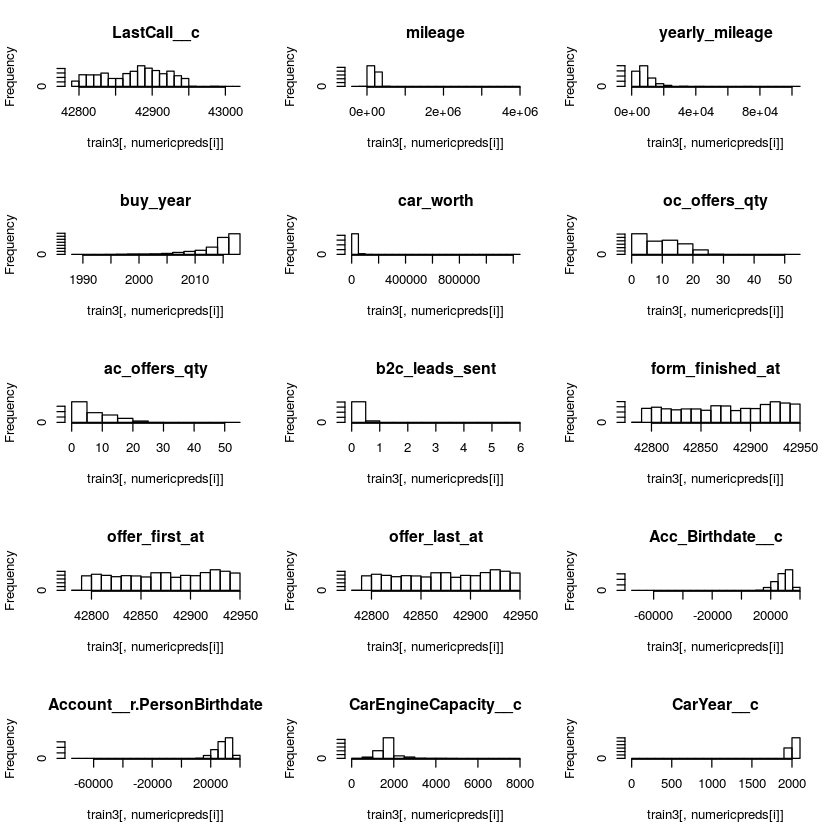

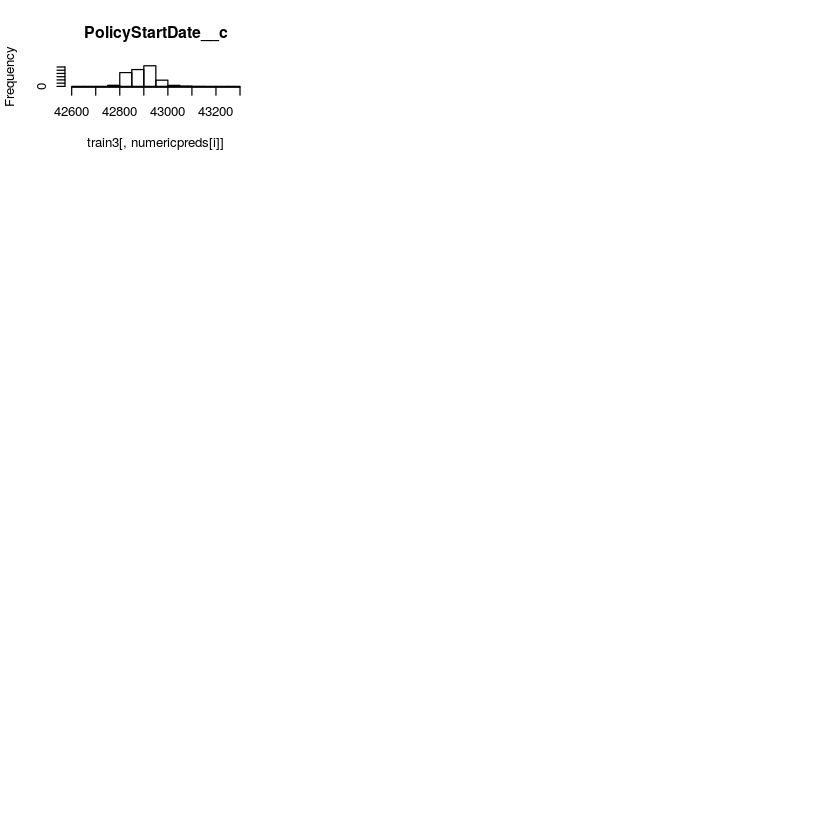

In [42]:
#rozkład wartości w predyktorach
par(mfrow=c(5,3))
for (i in 1:length(numericpreds)){
    hist(train3[,numericpreds[i]],main=colnames(train3)[numericpreds[i]])
}

Imputacja brakujących danych przez średnie (inne metody są niewykonalne w skończonym czasie)

In [43]:
for (numericpred in numericpreds){
    train3[which(is.na(train3[,numericpred])),numericpred] = as.integer(mean(na.omit(train3[,numericpred])))
}

In [44]:
#nie ma już żadnych brakujących wartości
any(sapply(train3,function(x)any(is.na(x))))

[1] FALSE

## Zamiana logical na numeric

In [45]:
(linds = which(sapply(train3,class)%in%c('logical')))

[1] 52 53 57 58 78 79

In [46]:
for (l in linds){
    train3[,l] = as.integer(train3[,l])
}

## Korelacje

In [47]:
#korelacja nie dziala dla factorow - sprawdzam zatem tylko dla ilosciowych
numerics = which(sapply(train3,class)%in%c('numeric','integer'))
cr = cor(train3[,numerics])

In [48]:
correlated = findCorrelation(cr,cutoff= 0.8,names=TRUE)

In [49]:
correlated

[1] "Account__r.CreatedDate"       "CreatedDate"                 
 [3] "created_at"                   "form_finished_at"            
 [5] "created_at_date"              "insurance_start_date"        
 [7] "offer_first_at"               "phone_yes"                   
 [9] "phone_no"                     "phone_acceptance"            
[11] "phone_accepted"               "Acc_Agreement_call__c"       
[13] "Acc_Agreement_marketing__c"   "Account__r.AgreementCall__pc"
[15] "oc_offers_qty"                "Acc_Birthdate__c"

In [50]:
traininds = sapply(correlated,function(cc)which(colnames(train3)==cc))

In [51]:
train4 = train3[,-traininds]

In [52]:
ncol(train4)

[1] 65

## Współliniowość

In [53]:
#podobnie jak wczesniej, znowu dla ilosciowych tylko
numerics = which(sapply(train4,class)%in%c('numeric','integer'))

In [54]:
numerics

[1]  1  5 11 12 13 22 23 24 26 29 30 31 32 33 34 35 36 41 44 48 53 57 59 62 63
[26] 65

In [55]:
combos = findLinearCombos(train4[,numerics])

In [56]:
combos

$linearCombos
list()

$remove
NULL


Korelacja usunęła współliniowości.

## Zamiana kodów pocztowych na rejon

### Funkcja

In [57]:
postalCodeToRegion = function (vector){
    vector = as.character(vector)
    codes = sapply(vector,function(v){
        if (is.na(v) | (substr(v,3,3) != '-') | (nchar(v) != 6)){
            NA
        } else {
            aa = substr(v,1,2)
            a = substr(aa,1,1)
            if (a == '0'){
                if (aa %in% c('00','01','02','03','04','05')){
                    'Warsaw'
                } else {
                    'Warsaw Region'
                }
            }else if (a == '1'){
                if (aa == '10'){
                    'Olsztyn'
                } else if (aa=='15'){
                    'Bialystok'
                } else {
                    'Olsztyn Region'
                }
            }else if (a == '2'){
                if (aa == '20'){
                    'Lublin'
                } else if (aa=='25'){
                    'Kielce'
                } else if (aa=='26'){
                    'Radom'
                } else {
                    'Lublin Region'
                }
            }else if (a == '3'){
                if (aa %in% c('30','31')){
                    'Krakow'
                } else if (aa=='35'){
                    'Rzeszow'
                } else {
                    'Krakow Region'
                }
            }else if (a == '4'){
                if (aa =='40'){
                    'Katowice'
                } else if (aa=='45'){
                    'Opole'
                } else {
                    'Katowice Region'
                }
            }else if (a == '5'){
                if (aa %in% c('50','51','52','53','54')){
                    'Wroclaw'
                } else {
                    'Wroclaw Region'
                }
            }else if (a == '6'){
                if (aa %in% c('60','61')){
                    'Poznan'
                } else if (aa=='65'){
                    'Zielona Gora'
                } else {
                    'Poznan Region'
                }
            }else if (a == '7'){
                if (aa %in% c('70','71')){
                    'Szczecin'
                } else if (aa=='75'){
                    'Koszalin'
                } else {
                    'Szczecin Region'
                }
            }else if (a == '8'){
                if (aa=='80'){
                    'Gdansk'
                } else if (aa=='81'){
                    'Gdynia'
                } else if (aa=='87'){
                    'Torun'
                }  else if (aa=='85'){
                    'Bydgoszcz'
                } else {
                    'Gdansk Region'
                }
            }else if (a == '9'){
                if (aa %in% c('90','91','92','93','94')){
                    'Lodz'
                } else {
                    'Lodz Region'
                }
            }else {NA}
        }
    })
    fcodes = as.factor(codes)
    fcodes = addNA(fcodes)
    fcodes
}

In [58]:
#unit test
(fac = postalCodeToRegion(c('87-165','00-849','44-123',NA)))
class(fac)
levels(fac)

87-165          00-849          44-123            <NA> 
          Torun          Warsaw Katowice Region            <NA> 
Levels: Katowice Region Torun Warsaw <NA>

[1] "factor"

[1] "Katowice Region" "Torun"           "Warsaw"          NA

In [59]:
#kodami pocztowymi są:
#night_parking_place_postal_code
#day_parking_place_postal_code
#main_driver_postal_code
#Account__r.BillingPostalCode

train4$night_parking_place_postal_code = postalCodeToRegion (train4$night_parking_place_postal_code)
train4$day_parking_place_postal_code = postalCodeToRegion (train4$day_parking_place_postal_code)
train4$main_driver_postal_code = postalCodeToRegion (train4$main_driver_postal_code)
train4$Account__r.BillingPostalCode = postalCodeToRegion (train4$Account__r.BillingPostalCode)

In [60]:
class(train4$night_parking_place_postal_code)
class(train4$day_parking_place_postal_code)
class(train4$main_driver_postal_code)
class(train4$Account__r.BillingPostalCode)

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

In [61]:
head(train4$night_parking_place_postal_code)
head(train4$day_parking_place_postal_code)
head(train4$main_driver_postal_code)
head(train4$Account__r.BillingPostalCode)

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] <NA>            <NA>            <NA>            Katowice Region
[5] <NA>            <NA>           
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

## Daty na year,month,day

Nie trzeba zamieniać dat na year, month, day. Daty albo zostały usunięte wcześniej, albo zamienione na numeric (domyślnie najwidoczniej przez read.table).

In [62]:
colnames(train4)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "etx_model_code"                   
 [7] "protection_scope"                  "kind"                             
 [9] "use_frequency"                     "child_carriage_frequency"         
[11] "mileage"                           "yearly_mileage"                   
[13] "used_abroad"                       "night_parking_place"              
[15] "night_parking_place_postal_code"   "day_parking_place"                
[17] "day_parking_place_postal_code"     "theft_protection_installation"    
[19] "theft_protection_device_1"         "theft_protection_device_2"        
[21] "origin"                            "buy_year"                         
[23] "registration_date"                 "car_worth"                        
[25] "main_driver_postal_code"           "main_driver_age"                  
[27] "main_driver_gender"                "phone_exists"                     
[29] "step"                              "oc_offer_min_val"                 
[31] "ac_offers_qty"                     "b2c_leads_sent"                   
[33] "offer_last_at"                     "offer_first_after"                
[35] "offer_last_after"                  "phone_lookup_status"              
[37] "utm_campaign"                      "utm_content"                      
[39] "utm_medium"                        "utm_source"                       
[41] "went_to_partners"                  "Acc_PhoneHLRStatus__c"            
[43] "Account__r.AccountSource"          "Account__r.AgreementMarketing__pc"
[45] "Account__r.BillingCity"            "Account__r.BillingPostalCode"     
[47] "Account__r.Gender__pc"             "Account__r.PersonBirthdate"       
[49] "Account__r.PhoneHLRStatus__pc"     "Account__r.PhoneNATStatus__pc"    
[51] "Account__r.Salutation"             "CalculationToken__c"              
[53] "CarEngineCapacity__c"              "CarFuelType__c"                   
[55] "CarMake__c"                        "CarModel__c"                      
[57] "CarYear__c"                        "Mpc__c"                           
[59] "PolicyStartDate__c"                "ProductScope__c"                  
[61] "Source__c"                         "WentToPartner__c"                 
[63] "dont_have_this_car__c"             "TelehubStatus__c"                 
[65] "Sale.success"

## Propozycja radzenia sobie z markami pojazdów i innymi factorami

In [63]:
#wybieranie pierwszej części stringa określającego markę, zbije trochę liczbę poziomów

length(unique(sapply(as.character(levels(train4$etx_model_name)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$etx_model_name))

length(unique(sapply(as.character(levels(train4$CarModel__c)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$CarModel__c))

[1] 666

[1] 729

[1] 766

[1] 1526

In [64]:
etxmodel = sapply(as.character(train4$etx_model_name),function(model){
    strsplit(model,' ')[[1]][1]
})

cmodel = sapply(as.character(train4$CarModel__c),function(model){
    strsplit(model,' ')[[1]][1]
})

In [65]:
etxmodel = as.factor(etxmodel)
#etxmodel = addNA(etxmodel)

cmodel = as.factor(cmodel)
#cmodel = addNA(cmodel)

In [66]:
any(is.na(etxmodel))

[1] FALSE

In [67]:
any(is.na(cmodel))

[1] TRUE

In [68]:
cmodel = addNA(cmodel)

In [69]:
chisq.test(table(etxmodel,cmodel))

Warning message in chisq.test(table(etxmodel, cmodel)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(etxmodel, cmodel)
X-squared = 54187000, df = 507960, p-value < 2.2e-16


### Marki są zależne. Można wyrzucić jeden z atrybutów marki.

In [70]:
ncol(train4)
train4$CarModel__c = NULL
ncol(train4)

[1] 65

[1] 64

In [90]:
head(train4)

,LastCall__c,etx_make_name,etx_model_name,etx_fuel_code,production_year,protection_scope,kind,use_frequency,child_carriage_frequency,mileage,⋯,CarFuelType__c,CarYear__c,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,42874,RENAULT,Megane,100001,1997,1,car,regularly,3,200000,⋯,Benzyna,2001,NA,42811,OC,full_calc,0,0,NA,0
3,42874,MAZDA,323,100001,1996,1,car,occasionally,3,160000,⋯,Benzyna,2001,NA,42794,OC,full_calc,0,0,NA,0
4,42874,AUDI,Q7,100003,2007,2,car,regularly,3,262000,⋯,Olej napędowy,2001,NA,42795,OC+AC,full_calc,0,0,NA,0
5,42874,VOLKSWAGEN,Passat,100003,2001,1,car,occasionally,3,250000,⋯,Olej napędowy,2001,NA,42807,OC,full_calc,1,0,NA,0
6,42874,PEUGEOT,406,100003,2000,1,car,regularly,3,290000,⋯,Olej napędowy,2001,NA,42803,OC,full_calc,0,0,NA,0
7,42874,SKODA,Fabia,100001,2001,1,car,regularly,3,230000,⋯,Benzyna,2001,NA,42822,OC,full_calc,0,0,NA,1


In [91]:
#model code do wyrzucenia
train4$etx_model_code = NULL

In [92]:
#calculation token tez
train4$CalculationToken__c = NULL
#i car make- jeden juz jest w danych (etx_make_name)
train4$CarMake__c = NULL

In [93]:
library(Matrix)

In [94]:
mdtrain4 = sparse.model.matrix(Sale.success~.,train4)

In [95]:
head(train$PreviousCalculationToken__c)

NULL

In [96]:
unique(train$is_damaged
)

[1] "0" "1"

In [97]:
preds

[1] "LastCall__c"                        "calculation_id"                    
  [3] "calculation_token"                  "etx_make_name"                     
  [5] "etx_model_name"                     "etx_fuel_code"                     
  [7] "production_year"                    "etx_model_code"                    
  [9] "vehicle_id"                         "protection_scope"                  
 [11] "kind"                               "usage_type"                        
 [13] "use_frequency"                      "child_carriage_frequency"          
 [15] "mileage"                            "yearly_mileage"                    
 [17] "used_abroad"                        "night_parking_place"               
 [19] "night_parking_place_postal_code"    "day_parking_place"                 
 [21] "day_parking_place_postal_code"      "theft_protection_installation"     
 [23] "theft_protection_device_1"          "theft_protection_device_2"         
 [25] "origin"                             "buy_year"                          
 [27] "registration_date"                  "is_damaged"                        
 [29] "leasing"                            "car_worth"                         
 [31] "main_driver_postal_code"            "main_driver_age"                   
 [33] "main_driver_gender"                 "insurance_start_date"              
 [35] "phone_exists"                       "calc_complete"                     
 [37] "calc_incomplete"                    "calc_finished"                     
 [39] "phone_yes"                          "phone_no"                          
 [41] "calculation_type"                   "terms_acceptance"                  
 [43] "phone_acceptance"                   "phone_accepted"                    
 [45] "step"                               "created_at"                        
 [47] "created_at_date"                    "affiliation_id"                    
 [49] "user_id"                            "salesforce_lead"                   
 [51] "sent_to_sf"                         "sf_r_purchasing"                   
 [53] "calculation_state"                  "oc_offers_qty"                     
 [55] "oc_offer_min_val"                   "ac_offers_qty"                     
 [57] "ac_offer_min_val"                   "b2c_leads_sent"                    
 [59] "form_finished_at"                   "offer_first_at"                    
 [61] "offer_last_at"                      "offer_first_after"                 
 [63] "offer_last_after"                   "phone_lookup_status"               
 [65] "utm_campaign"                       "utm_content"                       
 [67] "utm_medium"                         "utm_source"                        
 [69] "pkb_transform_ver"                  "went_to_partners"                  
 [71] "contact_requests"                   "Acc_Agreement_call__c"             
 [73] "Acc_Agreement_marketing__c"         "Acc_Agreement_newsletter__c"       
 [75] "Acc_Birthdate__c"                   "Acc_PhoneHLRStatus__c"             
 [77] "Account__r.AccountSource"           "Account__r.AgreementCall__pc"      
 [79] "Account__r.AgreementMarketing__pc"  "Account__r.AgreementNewsletter__pc"
 [81] "Account__r.BillingCity"             "Account__r.BillingPostalCode"      
 [83] "Account__r.CreatedById"             "Account__r.CreatedDate"            
 [85] "Account__r.Gender__pc"              "Account__r.Id"                     
 [87] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
 [89] "Account__r.LegacyID__c"             "Account__r.OwnerId"                
 [91] "Account__r.PersonBirthdate"         "Account__r.PersonContactId"        
 [93] "Account__r.PhoneHLRStatus__pc"      "Account__r.PhoneNATStatus__pc"     
 [95] "Account__r.RecordTypeId"            "Account__r.Salutation"             
 [97] "Account__r.Type"                    "CalculationToken__c"               
 [99] "CarEngineCapacity__c"               "CarFuelType__c"                    
[1

## W tym momencie - przerobione dane treningowe są w zmiennej train4, etykieta to Sale.success

## Podejście stare - bez predyktora LastCall__c

In [98]:
train4nl = train4[,-which(colnames(train4)=='LastCall__c')]
mdtrain4nl = sparse.model.matrix(Sale.success~.,train4nl)

In [99]:
dim(train4nl)
dim(train4)

[1] 93646    60

[1] 93646    61

## Podejście 3 - eliminacja ewidentnie zależnych predyktorów, przekształcenia kolumn

In [100]:
colnames(train4)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CarEngineCapacity__c"              "CarFuelType__c"                   
[53] "CarYear__c"                        "Mpc__c"                           
[55] "PolicyStartDate__c"                "ProductScope__c"                  
[57] "Source__c"                         "WentToPartner__c"                 
[59] "dont_have_this_car__c"             "TelehubStatus__c"                 
[61] "Sale.success"

In [101]:
train4m = train4
train4m$contactDifference = (train4m$LastCall__c)-(train4m$offer_last_at)

In [102]:
train4m$timeWaiting = (train4m$offer_last_after)-(train4m$offer_first_after)

In [103]:
head(train4m$timeWaiting)

[1]  0  0 18 17 31  0

In [104]:
train4m$hurryTime = (train4m$PolicyStartDate__c)-(train4m$offer_last_at)

In [105]:
#czas wypelniania ankiety

In [303]:
formFillingTime = (train$form_finished_at)-(train$created_at)
train4m$formFillingTime = formFillingTime

In [304]:
#imputacja
train4m$formFillingTime[is.na(formFillingTime)] = mean(train4m$formFillingTime[!is.na(formFillingTime)])

In [108]:
mdtrain4m = sparse.model.matrix(Sale.success~.,train4m)

In [305]:
dim(train4m)
dim(mdtrain4m)

[1] 93646    65

[1] 93646  8787

In [110]:
dim(mdtrain4m)
dim(mdtrain4)

[1] 93646  8787

[1] 93646  8783

## Train4 z obniżonymi levelami factorów

In [111]:
sapply(train4,function(l)length(levels(l)))

LastCall__c                     etx_make_name 
                                0                                69 
                   etx_model_name                     etx_fuel_code 
                              729                                 6 
                  production_year                  protection_scope 
                                0                                 3 
                             kind                     use_frequency 
                                3                                 3 
         child_carriage_frequency                           mileage 
                                4                                 0 
                   yearly_mileage                       used_abroad 
                                0                                 0 
              night_parking_place   night_parking_place_postal_code 
                                7                                31 
                day_parking_place     day_parking_place_postal_code 
                                7                                31 
    theft_protection_installation         theft_protection_device_1 
                                5                                 5 
        theft_protection_device_2                            origin 
                                6                                 5 
                         buy_year                 registration_date 
                                0                                 0 
                        car_worth           main_driver_postal_code 
                                0                                31 
                  main_driver_age                main_driver_gender 
                                0                                 3 
                     phone_exists                              step 
                                3                                 0 
                 oc_offer_min_val                     ac_offers_qty 
                                0                                 0 
                   b2c_leads_sent                     offer_last_at 
                                0                                 0 
                offer_first_after                  offer_last_after 
                                0                                 0 
              phone_lookup_status                      utm_campaign 
                                0                               102 
                      utm_content                        utm_medium 
                              286                                48 
                       utm_source                  went_to_partners 
                               79                                 0 
            Acc_PhoneHLRStatus__c          Account__r.AccountSource 
                                5                                22 
Account__r.AgreementMarketing__pc            Account__r.BillingCity 
                                0                              7174 
     Account__r.BillingPostalCode             Account__r.Gender__pc 
                               31                                 3 
       Account__r.PersonBirthdate     Account__r.PhoneHLRStatus__pc 
                                0                                 5 
    Account__r.PhoneNATStatus__pc             Account__r.Salutation 
                                8                                 6 
             CarEngineCapacity__c                    CarFuelType__c 
                                0                                 6 
                       CarYear__c                            Mpc__c 
                                0                                23 
               PolicyStartDate__c                   ProductScope__c 
                                0                                 4 
                        Source__c                  WentToPartner__c 
                               18                                 0 
            dont_hav

In [112]:
#upraszczanie factorów Mpc__c

In [166]:
train4l = train4

In [167]:
train4l$Mpc__c = as.factor(tolower(train4l$Mpc__c))
train4l$Mpc__c = addNA(train4l$Mpc__c)

In [168]:
utm_campaign = sapply(train4$utm_campaign, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('mailing',u,ignore.case=T)>0) {"mailing"} else if 
        (regexpr('kalkulator',u,ignore.case=T)>0){"kalkulator"} else if 
        (regexpr('baner',u,ignore.case=T)>0){"baner"}  else if 
        (regexpr('sprzedany',u,ignore.case=T)>0){"sprzedany"} else
            {u}
})

utm_campaign = as.factor(utm_campaign)
utm_campaign = addNA(utm_campaign)
train4l$utm_campaign = utm_campaign

In [169]:
utm_content = sapply(train4$utm_content, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('OC',u,ignore.case=T)>0) {"OC"} else if 
        (regexpr('button',u,ignore.case=T)>0){"button"} else
            {u}
})

utm_content = as.factor(utm_content)
utm_content = addNA(utm_content)
train4l$utm_content = utm_content

In [170]:
utm_medium = sapply(train4$utm_medium, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('baner',u,ignore.case=T)>0) {"baner"} else if 
        (regexpr('banner',u,ignore.case=T)>0){"baner"} else if 
        (regexpr('link',u,ignore.case=T)>0){"link"} else
            {u}
})

utm_medium = as.factor(utm_medium)
utm_medium = addNA(utm_medium)
train4l$utm_medium = utm_medium

In [171]:
salutation = sapply(train4$Account__r.Salutation, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('ms.',u,ignore.case=T)==1) {"pani"} else if 
        (regexpr('mr.',u,ignore.case=T)==1){"pan"} else if 
        (regexpr('brak',u,ignore.case=T)==1){NA} else
            {u}
})

salutation = as.factor(salutation)
salutation = addNA(salutation)
train4l$Account__r.Salutation = salutation

In [172]:
utm_source = sapply(train4$utm_source, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('forum',u,ignore.case=T)>0) {"forum"} else if 
        (regexpr('cc',u,ignore.case=T)>0){"cc"}  else
            {u}
})

utm_source = as.factor(utm_source)
utm_source = addNA(utm_source)
train4l$utm_source = utm_source

In [173]:
mdtrain4l = sparse.model.matrix(Sale.success~.,train4l)

In [174]:
dim(mdtrain4l)
dim(mdtrain4)

[1] 93646  8463

[1] 93646  8783

### Podejście 5 - lowfactors+modified

In [334]:
train4ml = train4l
train4ml$contactDifference=train4m$contactDifference
train4ml$timeWaiting=train4m$timeWaiting
train4ml$hurryTime=train4m$hurryTime
train4ml$formFillingTime = train4m$formFillingTime
train4ml$is_damaged = as.factor(train$is_damaged)
mdtrain4ml = sparse.model.matrix(Sale.success~.,train4ml)

### Podejście 6 - skalowane ml

In [126]:
train4mls = train4ml
train4mls$mileage = scale(train4mls$mileage)
train4mls$yearly_mileage = scale(train4mls$yearly_mileage)
train4mls$registration_date = scale(train4mls$registration_date)
train4mls$car_worth = scale(train4mls$car_worth)
train4mls$oc_offer_min_val = scale(train4mls$oc_offer_min_val)
train4mls$CarEngineCapacity__c = scale(train4mls$CarEngineCapacity__c)
train4mls$formFillingTime = scale(train4mls$formFillingTime)
train4mls$timeWaiting = scale(train4mls$timeWaiting)
train4mls$contactDifference = scale(train4mls$contactDifference)
train4mls$hurryTime = scale(train4mls$hurryTime)
mdtrain4mls = sparse.model.matrix(Sale.success~.,train4mls)

### Podejście 7 - łączenie factorów TelehubStatus success

In [517]:
train4tml = train4ml

In [518]:
summary(train4tml$TelehubStatus__c)
levels(train4tml$TelehubStatus__c)

failed_callmeback_inne                   failed_callmeback_kom 
                                    299                                     418 
                            failed_day1                             failed_day2 
                                   1736                                     323 
                     failed_health_day1                     failed_renewal_sold 
                                      5                                       1 
                in_progres_renewal_sold in_progres_renewal_with_call_but_unsold 
                                      8                                       5 
            in_progress_callmeback_inne              in_progress_callmeback_kom 
                                    401                                     210 
                       in_progress_day1                        in_progress_day2 
                                   2278                                      97 
                in_progress_health_day1                 in_progress_renewal_kom 
                                      4                                       4 
                success_callmeback_inne                  success_callmeback_kom 
                                   2078                                    2385 
                           success_day1                            success_day2 
                                  10813                                      45 
                    success_health_day1                    success_renewal_sold 
                                      4                                       1 
                                   <NA> 
                                  72531

[1] "failed_callmeback_inne"                 
 [2] "failed_callmeback_kom"                  
 [3] "failed_day1"                            
 [4] "failed_day2"                            
 [5] "failed_health_day1"                     
 [6] "failed_renewal_sold"                    
 [7] "in_progres_renewal_sold"                
 [8] "in_progres_renewal_with_call_but_unsold"
 [9] "in_progress_callmeback_inne"            
[10] "in_progress_callmeback_kom"             
[11] "in_progress_day1"                       
[12] "in_progress_day2"                       
[13] "in_progress_health_day1"                
[14] "in_progress_renewal_kom"                
[15] "success_callmeback_inne"                
[16] "success_callmeback_kom"                 
[17] "success_day1"                           
[18] "success_day2"                           
[19] "success_health_day1"                    
[20] "success_renewal_sold"                   
[21] NA

In [519]:
telehubstatus = sapply(train4tml$TelehubStatus__c, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('in_progres',u,ignore.case=T)>0) {"in_progress"} else if 
        (regexpr('success',u,ignore.case=T)>0){"success"}  else if 
        (regexpr('failed',u,ignore.case=T)>0){"failed"}  else
            {u}
})

telehubstatus = as.factor(telehubstatus)
telehubstatus = addNA(telehubstatus)
train4tml$TelehubStatus__c = telehubstatus

In [520]:
mdtrain4tml = sparse.model.matrix(Sale.success~.,train4tml)

# Funkcje do oceny modeli (ROC, AUC)

In [127]:
if (!require('pROC')){
    install.packages('pROC')
}
library('pROC')

Loading required package: pROC
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [128]:
#lib
#funkcje do rysowania ROC

tpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[which(ty==1)])/sum(ty)
}

fpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[-which(ty==1)])/(length(ty)-sum(ty))
}

#funkcja
drawROC = function(pred,ty,title="ROC"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = seq(0.001,0.999,0.001)
    ty = ty[!is.na(pred)]
    pred = pred[!is.na(pred)]
    dx = sapply(t, function(tt){
    fpr(t=tt,pred,ty)
    })
    dy = sapply(t, function(tt){
    tpr(t=tt,pred,ty)
    })
    plot(dx,dy,xlim=c(0,1),ylim=c(0,1),type="l",col=1,xaxs="i",yaxs="i")
    title(main=title)
    abline(0,1,col=2)
}

ROCcoords = function(pred,ty,title="ROC"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = seq(0.0001,0.9999,0.0001)

    dx = sapply(t, function(tt){
    fpr(t=tt,pred,ty)
    })
    dy = sapply(t, function(tt){
    tpr(t=tt,pred,ty)
    })
    return (data.frame(dx,dy))
}

library(pROC)
#usage - pROC::auc(test_y,pred)

#funkcje do lift
drawLIFT = function(pred,ty,title="LIFT"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = 1:100

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    dx = dx[!is.na(dy)]
    dy = dy[!is.na(dy)]

    plot(dx,dy,xlim=c(0,100),type="l",col=1,xaxs="i",yaxs="i")
    title(main=title)
    abline(1,0,col=2)
}

getLIFTS = function(pred,ty){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = c(5,10)

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    return(data.frame(lift5=dy[1],lift10=dy[2]))
}

LIFTcoords = function(pred,ty){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = 1:100

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    dx = dx[!is.na(dy)]
    dy = dy[!is.na(dy)]
    return (data.frame(dx,dy))
}

In [129]:
#hiperparametry

xgboosthiper = function (datax,datay,predictors=40,obj='binary:logistic'){
    
    n = nrow(datax)
    trx = datax
    try = datay

    xgsf = xgb.DMatrix(trx,label=try)

    #selekcja zmiennych ('predictors' most important)
    xg1=  xgboost(xgsf, nrounds=100, objective = obj,verbose=0)
    imp = xgb.importance(colnames(trx),xg1)
    sec = head(imp$Feature,predictors)
    inds = sapply(sec,function(sc)which(colnames(trx)==sc))
    ptrx = trx[,inds]

    #optymalizacja hiperparametrow
    sa = sample(1:nrow(ptrx),n/5,replace=F)
    optrx = as.matrix(ptrx[sa,])

    xgFitControl = trainControl (method="cv",number = 4) #4fold
    xgxo = optrx
    xgyo = as.factor(try[sa])
    xgModel = train(xgxo,xgyo,method = "xgbTree",trControl = xgFitControl)

    return (xgModel$bestTune)
}

In [130]:
#kombajn działający dla fold, dokonujący selekcji zmiennych na każdym foldzie i optymalizujący hiperparametry
#zwraca uśrednione AUC, LIFT5 i LIFT10

xgboostmeasure = function (datax,datay,k=10, rk=5, obj= 'binary:logistic',predictors=40){
    retdf = data.frame(AUC=rep(0,k),LIFT5=rep(0,k),LIFT10=rep(0,k))
    
    tune = list(nrounds=50,max_depth=1,eta=0.3,gamma=0,colsample_bytree=0.8,min_child_weight=1,subsample=0.75)
      
    xgsf = xgb.DMatrix(datax,label=datay)

    #selekcja zmiennych ('predictors' most important)
    xg1=  xgboost(xgsf, nrounds=100, objective = obj,verbose=0)
    imp = xgb.importance(colnames(datax),xg1)
    sec = head(imp$Feature,predictors)
    inds = sapply(sec,function(sc)which(colnames(datax)==sc))
    pdatax = datax[,inds]    
        
    set.seed(997)
        
    for (j in 1:rk){
        sequence = sample(1:nrow(datax),nrow(datax),replace=F)
        for (i in 1:k){
            n = nrow(datax)
            nf = as.integer(nrow(datax)/k)
            tf = ((i-1)*nf+1):(i*nf) #indeksy zb. testowego

            trx = pdatax[sequence[-tf],]
            try = datay[sequence[-tf]]
            tsx = pdatax[sequence[tf],]
            tsy = datay[sequence[tf]]


            #trenowanie modelu
            rtrx = xgb.DMatrix(trx,label=try)
            model =  xgboost(params= tune, data = rtrx, nrounds=tune$nrounds, 
                             objective = obj,verbose=0)

            #predykcja
            rtsx = xgb.DMatrix(tsx)
            predy = predict(model,rtsx,type="response")

            rauc = pROC::auc(tsy,predy)
            retdf[i,1] = rauc
            lifts = getLIFTS(predy,tsy)
            retdf[i,2] = lifts$lift5
            retdf[i,3] = lifts$lift10
            print(paste0("Arrange nr ",j," Fold nr ",i,", AUC ROC= ",rauc,", LIFT5= ",lifts$lift5,", LIFT10= ",lifts$lift10))
        }
    }
    return (retdf)
}

In [131]:
?xgboost

In [132]:
#coś co pozwoli zrobić dummies wszędzie
library(Matrix)
library(xgboost)
mdtrain4 = sparse.model.matrix(Sale.success~.,train4)
trainy = train4$Sale.success

## XGBoost

In [133]:
library(xgboost)
library(caret)
library(glmnet)

Loading required package: foreach
Loaded glmnet 2.0-13


Attaching package: ‘glmnet’

The following object is masked from ‘package:pROC’:

    auc



In [134]:
#benchmark, model 1

In [135]:
xg4scores = xgboostmeasure(datax=mdtrain4,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.842540977707232, LIFT5= 5.58441558441558, LIFT10= 5.08658008658009"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.841130617977528, LIFT5= 5.21551724137931, LIFT10= 4.56896551724138"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.835087447372367, LIFT5= 5.18201284796574, LIFT10= 4.68950749464668"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.855178815630352, LIFT5= 5.88486140724947, LIFT10= 5.01066098081023"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.847129504068191, LIFT5= 5.73275862068965, LIFT10= 4.80603448275862"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.82674175710518, LIFT5= 5.12295081967213, LIFT10= 4.36475409836066"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.851392450600637, LIFT5= 5.83518930957684, LIFT10= 4.87750556792873"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.850285906491759, LIFT5= 5.52808988764045, LIFT10= 4.65168539325843"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.843715378085455, LIFT5= 5.41176470588235, LIFT10= 4.44705882352941"
[1] "Arrange nr 1 Fold nr 10,

In [136]:
xg4nlscores = xgboostmeasure(datax=mdtrain4nl,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.841821260069968, LIFT5= 5.58441558441558, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.840239248353351, LIFT5= 5.12931034482759, LIFT10= 4.61206896551724"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.83632827175823, LIFT5= 5.18201284796574, LIFT10= 4.68950749464668"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.853644209691125, LIFT5= 6.05543710021322, LIFT10= 5.09594882729211"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.846304484695854, LIFT5= 5.81896551724138, LIFT10= 4.67672413793103"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.825037377455507, LIFT5= 5.12295081967213, LIFT10= 4.38524590163934"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.852846295188285, LIFT5= 5.87973273942093, LIFT10= 4.92204899777283"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.84867200560349, LIFT5= 5.43820224719101, LIFT10= 4.71910112359551"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.843984917381205, LIFT5= 5.41176470588235, LIFT10= 4.42352941176471"
[1] "Arrange nr 1 Fold nr 10, 

In [137]:
xg4mscores = xgboostmeasure(datax=mdtrain4m,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.853284100756579, LIFT5= 6.01731601731602, LIFT10= 4.95670995670996"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.844502494188299, LIFT5= 5.60344827586207, LIFT10= 4.67672413793103"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.842867660561665, LIFT5= 5.91006423982869, LIFT10= 4.81798715203426"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.861568452605678, LIFT5= 6.26865671641791, LIFT10= 5.18123667377399"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.856127591049981, LIFT5= 6.29310344827586, LIFT10= 4.93534482758621"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.831302083718113, LIFT5= 5.40983606557377, LIFT10= 4.42622950819672"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.854346232107993, LIFT5= 6.01336302895323, LIFT10= 4.92204899777283"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.858483908232772, LIFT5= 5.97752808988764, LIFT10= 4.65168539325843"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.858385922889124, LIFT5= 5.50588235294118, LIFT10= 4.84705882352941"
[1] "Arrange nr 1 Fold nr 10

In [138]:
xg4lscores = xgboostmeasure(datax=mdtrain4l,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.844312188223669, LIFT5= 5.58441558441558, LIFT10= 5.06493506493506"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.841658393064704, LIFT5= 5.21551724137931, LIFT10= 4.59051724137931"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.83718292550553, LIFT5= 5.35331905781585, LIFT10= 4.73233404710921"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.855118649105712, LIFT5= 5.97014925373134, LIFT10= 4.92537313432836"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.848058165439752, LIFT5= 5.68965517241379, LIFT10= 4.74137931034483"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.825591344129315, LIFT5= 5, LIFT10= 4.38524590163934"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.850871195040515, LIFT5= 5.79064587973274, LIFT10= 4.83296213808463"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.849265990670088, LIFT5= 5.61797752808989, LIFT10= 4.62921348314607"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.844528733968137, LIFT5= 5.55294117647059, LIFT10= 4.51764705882353"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.846

In [307]:
xg4mlscores = xgboostmeasure(datax=mdtrain4ml,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.853531138972613, LIFT5= 5.93073593073593, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.84496367686943, LIFT5= 5.21551724137931, LIFT10= 4.6551724137931"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.841940802893163, LIFT5= 5.78158458244111, LIFT10= 4.796573875803"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.861968763745714, LIFT5= 6.26865671641791, LIFT10= 5.09594882729211"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.855777072839984, LIFT5= 6.29310344827586, LIFT10= 5"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.831580625410944, LIFT5= 5.36885245901639, LIFT10= 4.4672131147541"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.851985155521024, LIFT5= 5.96881959910913, LIFT10= 4.87750556792873"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.859986444794663, LIFT5= 6.1123595505618, LIFT10= 4.74157303370786"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.856870817238407, LIFT5= 5.74117647058823, LIFT10= 4.87058823529412"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.85836109

In [140]:
xg4mlscores60 = xgboostmeasure(datax=mdtrain4ml,datay=trainy,predictors=60)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.85417560235017, LIFT5= 5.97402597402597, LIFT10= 5.02164502164502"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.846548333979078, LIFT5= 5.51724137931034, LIFT10= 4.54741379310345"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.842324807414091, LIFT5= 5.73875802997859, LIFT10= 4.77516059957173"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.860560603391139, LIFT5= 6.18336886993603, LIFT10= 5.01066098081023"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.855485155947307, LIFT5= 6.03448275862069, LIFT10= 4.97844827586207"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.831884447099934, LIFT5= 5.40983606557377, LIFT10= 4.52868852459016"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.855319292451475, LIFT5= 5.74610244988864, LIFT10= 4.94432071269488"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.8591024589596, LIFT5= 6.20224719101124, LIFT10= 4.69662921348315"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.854374551700085, LIFT5= 5.6, LIFT10= 4.94117647058824"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.858

In [141]:
xg4mlsscores = xgboostmeasure(datax=mdtrain4mls,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.853678364996046, LIFT5= 5.93073593073593, LIFT10= 5.02164502164502"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.845634322936846, LIFT5= 5.43103448275862, LIFT10= 4.7198275862069"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.844171061679237, LIFT5= 5.78158458244111, LIFT10= 4.73233404710921"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.860396883326082, LIFT5= 6.39658848614072, LIFT10= 5.07462686567164"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.855846692173576, LIFT5= 6.16379310344828, LIFT10= 5.06465517241379"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.832014194660126, LIFT5= 5.45081967213115, LIFT10= 4.44672131147541"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.854824892857187, LIFT5= 6.05790645879733, LIFT10= 4.92204899777283"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.860309325754512, LIFT5= 6.02247191011236, LIFT10= 4.67415730337079"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.858578469759086, LIFT5= 5.6, LIFT10= 4.75294117647059"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.8

In [142]:
xg4mlscores30 = xgboostmeasure(datax=mdtrain4ml,datay=trainy,predictors=30)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.854792225298853, LIFT5= 6.06060606060606, LIFT10= 4.93506493506493"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.845705758426966, LIFT5= 5.51724137931034, LIFT10= 4.63362068965517"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.841351498556283, LIFT5= 5.52462526766595, LIFT10= 4.66809421841542"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.859515839257099, LIFT5= 6.31130063965885, LIFT10= 5.0319829424307"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.855259952537776, LIFT5= 6.07758620689655, LIFT10= 5.04310344827586"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.830893332729999, LIFT5= 5.5327868852459, LIFT10= 4.38524590163934"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.852711765536176, LIFT5= 5.87973273942093, LIFT10= 4.85523385300668"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.857175881308808, LIFT5= 6.02247191011236, LIFT10= 4.78651685393258"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.855270032836941, LIFT5= 5.50588235294118, LIFT10= 4.77647058823529"
[1] "Arrange nr 1 Fold nr 10, 

In [437]:
xg4tmlscores = xgboostmeasure(datax=mdtrain4tml,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.854708339290456, LIFT5= 5.93073593073593, LIFT10= 5.06493506493506"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.848993970360325, LIFT5= 5.47413793103448, LIFT10= 4.7198275862069"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.844380934410199, LIFT5= 5.65310492505353, LIFT10= 4.75374732334047"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.860740743404155, LIFT5= 6.43923240938166, LIFT10= 5.05330490405117"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.857202876791941, LIFT5= 5.99137931034483, LIFT10= 5"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.831921847642196, LIFT5= 5.49180327868852, LIFT10= 4.50819672131148"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.854809403835032, LIFT5= 6.01336302895323, LIFT10= 4.98886414253898"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.8614938944886, LIFT5= 6.06741573033708, LIFT10= 4.71910112359551"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.857985430664043, LIFT5= 5.50588235294118, LIFT10= 4.84705882352941"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.86148

In [438]:
bxdataframe=data.frame(T=xg4scores$AUC,F=xg4nlscores$AUC,M=xg4mscores$AUC,L=xg4lscores$AUC, ML40 = xg4mlscores$AUC, ML60=xg4mlscores60$AUC, ML30=xg4mlscores30$AUC, SML = xg4mlsscores$AUC, TML = xg4tmlscores$AUC)

In [439]:
sapply(bxdataframe,mean)

T         F         M         L      ML40      ML60      ML30       SML 
0.8434688 0.8424256 0.8519398 0.8442184 0.8521719 0.8517579 0.8511020 0.8520882 
      TML 
0.8532374

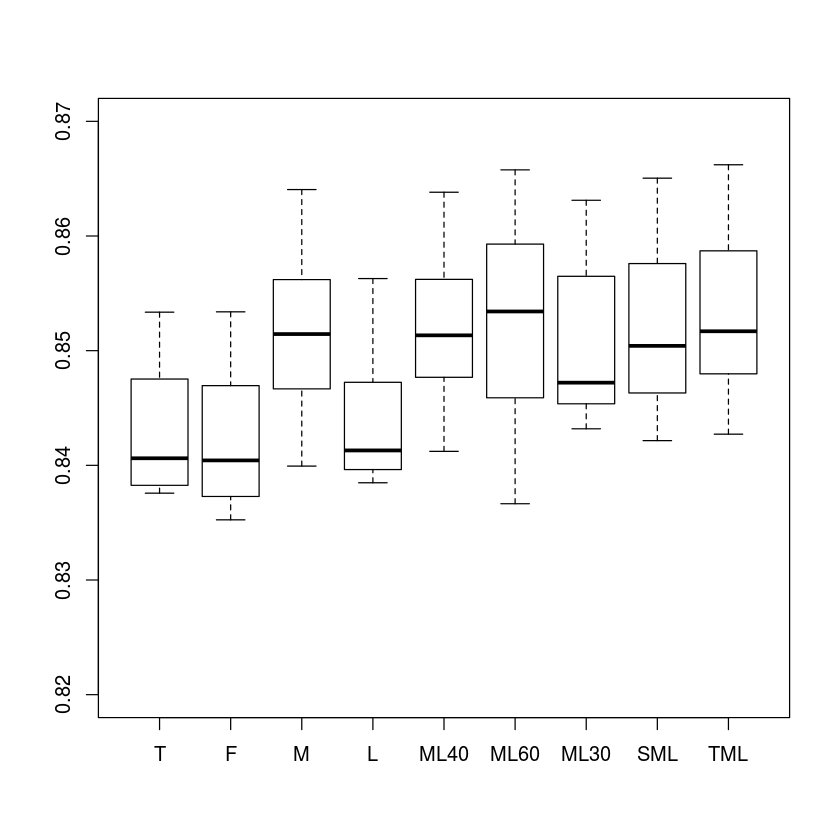

In [440]:
boxplot(bxdataframe,ylim=c(0.82,0.87))
abline(0.5,0,col="red")

In [443]:
bxdataframe2=data.frame(T=xg4scores$LIFT10,F=xg4nlscores$LIFT10,M=xg4mscores$LIFT10,L=xg4lscores$LIFT10, ML40 = xg4mlscores$LIFT10, ML60=xg4mlscores60$LIFT10, ML30=xg4mlscores30$LIFT10, SML = xg4mlsscores$LIFT10, TML = xg4tmlscores$LIFT10)

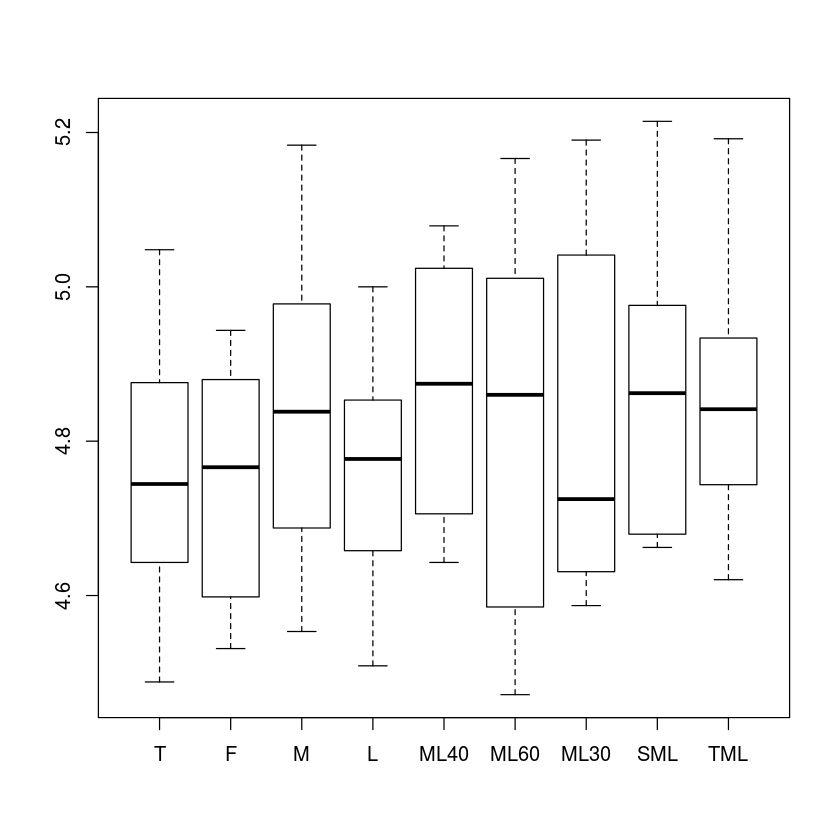

In [444]:
boxplot(bxdataframe2)

# Wyznaczenie scoringów

In [449]:
#polecam zamienic plik Student testowy na csv-kę

In [450]:
test = read.csv("Student-testowy.csv",header=TRUE)

### Wybieranie predyktorów zgodnie z train4

In [451]:
dim(train4)

[1] 93646    61

In [452]:
dim(test)

[1] 32967   117

In [453]:
indices_to_keep = unlist(sapply(colnames(train4),function(tt){which(colnames(test)==tt)}))

In [454]:
test2 = test[,indices_to_keep]

In [455]:
dim(test2)

[1] 32967    60

In [456]:
#zatem mamy wszystkie predyktory oprócz etykiety (której oczywiście nie ma)

### Konwersje kolumn, dodanie NA

In [457]:
a = data.frame(c(sapply(test2,class),'None'),sapply(train4,class))

In [458]:
test2$etx_fuel_code = as.factor(test2$etx_fuel_code)

test2$production_year = as.numeric(test2$production_year)

test2$protection_scope = as.factor(test2$protection_scope)

test2$child_carriage_frequency = as.factor(test2$child_carriage_frequency)

test2$mileage = as.numeric(test2$mileage)
test2$yearly_mileage = as.numeric(test2$yearly_mileage)
test2$used_abroad = as.numeric(test2$used_abroad)


test2$theft_protection_installation = as.factor(test2$theft_protection_installation)
test2$theft_protection_device_1 = as.factor(test2$theft_protection_device_1)
test2$theft_protection_device_2 = as.factor(test2$theft_protection_device_2)

test2$buy_year = as.numeric(test2$buy_year)
test2$car_worth = as.numeric(test2$car_worth)
test2$main_driver_age = as.numeric(test2$main_driver_age)
test2$step = as.numeric(test2$step)
test2$oc_offer_min_val = as.numeric(test2$oc_offer_min_val)
test2$ac_offers_qty = as.numeric(test2$ac_offers_qty)
test2$b2c_leads_sent = as.numeric(test2$b2c_leads_sent)
test2$offer_first_after = as.numeric(test2$offer_first_after)
test2$offer_last_after = as.numeric(test2$offer_last_after)
test2$phone_lookup_status = as.numeric(test2$phone_lookup_status)
test2$went_to_partners = as.numeric(test2$went_to_partners)
test2$Account__r.AgreementMarketing__pc = as.integer(test2$Account__r.AgreementMarketing__pc)
test2$CarEngineCapacity__c = as.numeric(test2$CarEngineCapacity__c)
test2$CarYear__c = as.numeric(test2$CarYear__c)
test2$WentToPartner__c = as.integer(test2$WentToPartner__c)
test2$dont_have_this_car__c = as.integer(test2$dont_have_this_car__c)


#kody pocztowe
test2$night_parking_place_postal_code = postalCodeToRegion (test2$night_parking_place_postal_code)
test2$day_parking_place_postal_code = postalCodeToRegion (test2$day_parking_place_postal_code)
test2$main_driver_postal_code = postalCodeToRegion (test2$main_driver_postal_code)
test2$Account__r.BillingPostalCode = postalCodeToRegion (test2$Account__r.BillingPostalCode)

Zamiana "" na NA dla factorow

In [459]:
factors = which(sapply(test2,class)=='factor')
for (i in factors){
    test2[,i] = sapply(as.character(test2[,i]),function(x){if(is.na(x) | x==''){NA}else{x}})
    test2[,i] = as.factor(test2[,i])
}

Dodanie NA do factorów

In [460]:
for (cc in 1:ncol(test2)){
    if (is.factor(test2[,cc]) & any(is.na(test2[,cc]))){
        test2[,cc] = addNA(test2[,cc])
    }
}

Zamiana dat na typ zgodny z obecnym w zbiorze treningowym

In [461]:
head(test2$registration_date)
head(test2$offer_last_at)
head(test2$Account__r.PersonBirthdate)
head(test2$PolicyStartDate__c)
head(test2$LastCall__c)

[1] 15-Jul-05 0:00:00 15-May-15 0:00:00 15-Nov-98 0:00:00 15-Jul-17 0:00:00
[5] 15-Apr-97 0:00:00 15-May-13 0:00:00
355 Levels: 15-Apr-00 0:00:00 15-Apr-01 0:00:00 ... 4-Mar-09 0:00:00

[1] 1-Aug-17 0:31:01 1-Aug-17 0:31:36 1-Aug-17 0:41:27 1-Aug-17 0:50:04
[5] 1-Aug-17 1:19:49 1-Aug-17 1:23:55
20966 Levels: 10-Aug-17 0:03:20 10-Aug-17 0:04:51 ... <NA>

[1] 11-Jan-1948 9-Dec-1966  24-Jul-1975 12-Jan-1991 26-Apr-1999 10-May-1985
14075 Levels: 10-Apr-1938 10-Apr-1948 10-Apr-1952 10-Apr-1953 ... <NA>

[1] 9-Aug-2017  7-Aug-2017  29-Oct-2017 1-Sep-2017  18-Aug-2017 4-Aug-2017 
218 Levels: 10-Aug-2017 10-Dec-2017 10-Feb-2018 10-Jan-2018 ... <NA>

[1] 1-Aug-17 11:26:08 2-Aug-17 14:04:58 <NA>              <NA>             
[5] <NA>              <NA>             
6239 Levels: 10-Aug-17 10:08:10 10-Aug-17 10:09:07 ... <NA>

In [463]:
test2$LastCall__c = sapply(as.character(test2$LastCall__c), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [464]:
test2$registration_date = sapply(as.character(test2$registration_date), function(rd){
    if (nchar(rd)<5) {NA} else {
    a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    as.numeric(aa-d0)
    }
})

In [466]:
test2$offer_last_at = sapply(as.character(test2$offer_last_at), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [468]:
test2$Account__r.PersonBirthdate = sapply(as.character(test2$Account__r.PersonBirthdate), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
        a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
        aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%Y')
        as.numeric(aa-d0)
    }
})

In [470]:
test2$PolicyStartDate__c = sapply(as.character(test2$PolicyStartDate__c), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
        a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
        aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%Y')
        as.numeric(aa-d0)
    }
})

Dwa predyktory odrzucone w zbiorze testowym na razie, które będą ważne:

In [471]:
head(test$created_at)

[1] 1-Aug-17 0:11:00 1-Aug-17 0:19:31 1-Aug-17 0:34:32 1-Aug-17 0:44:10
[5] 1-Aug-17 1:08:04 1-Aug-17 1:16:42
32642 Levels: 10-Aug-17 0:08:03 10-Aug-17 0:11:52 ... 9-Aug-17 9:59:33

In [472]:
ADD_THIS_created_at = sapply(as.character(test$created_at), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [473]:
head(ADD_THIS_created_at)

1-Aug-17 0:11:00 1-Aug-17 0:19:31 1-Aug-17 0:34:32 1-Aug-17 0:44:10 
        42948.01         42948.01         42948.02         42948.03 
1-Aug-17 1:08:04 1-Aug-17 1:16:42 
        42948.05         42948.05

In [474]:
any(is.na(ADD_THIS_created_at))

[1] FALSE

In [475]:
head(test$form_finished_at)

[1] 1-Aug-17 0:30:20 1-Aug-17 0:31:10 1-Aug-17 0:41:12 1-Aug-17 0:49:34
[5] 1-Aug-17 1:20:19 1-Aug-17 1:23:44
32648 Levels:  10-Aug-17 0:02:54 10-Aug-17 0:04:38 ... 9-Aug-17 9:58:19

In [476]:
ADD_THIS_form_finished_at = sapply(as.character(test$form_finished_at), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [477]:
head(ADD_THIS_form_finished_at)

1-Aug-17 0:30:20 1-Aug-17 0:31:10 1-Aug-17 0:41:12 1-Aug-17 0:49:34 
        42948.02         42948.02         42948.03         42948.03 
1-Aug-17 1:20:19 1-Aug-17 1:23:44 
        42948.06         42948.06

In [478]:
any(is.na(ADD_THIS_form_finished_at))

[1] TRUE

### Imputacja zbioru testowego

In [479]:
#wszystkie atrybuty numeryczne i integery (factory są już obsłużone przez NA)
test_numerics = which(sapply(test2,class)%in%c('numeric','integer'))
#wszystkie z NA
t = test_numerics[which(sapply(test2[,test_numerics],function(x)any(is.na(x))))]

In [480]:
colnames(test2)[t]

[1] "LastCall__c"                "mileage"                   
 [3] "car_worth"                  "ac_offers_qty"             
 [5] "b2c_leads_sent"             "offer_last_at"             
 [7] "Account__r.PersonBirthdate" "CarEngineCapacity__c"      
 [9] "CarYear__c"                 "PolicyStartDate__c"

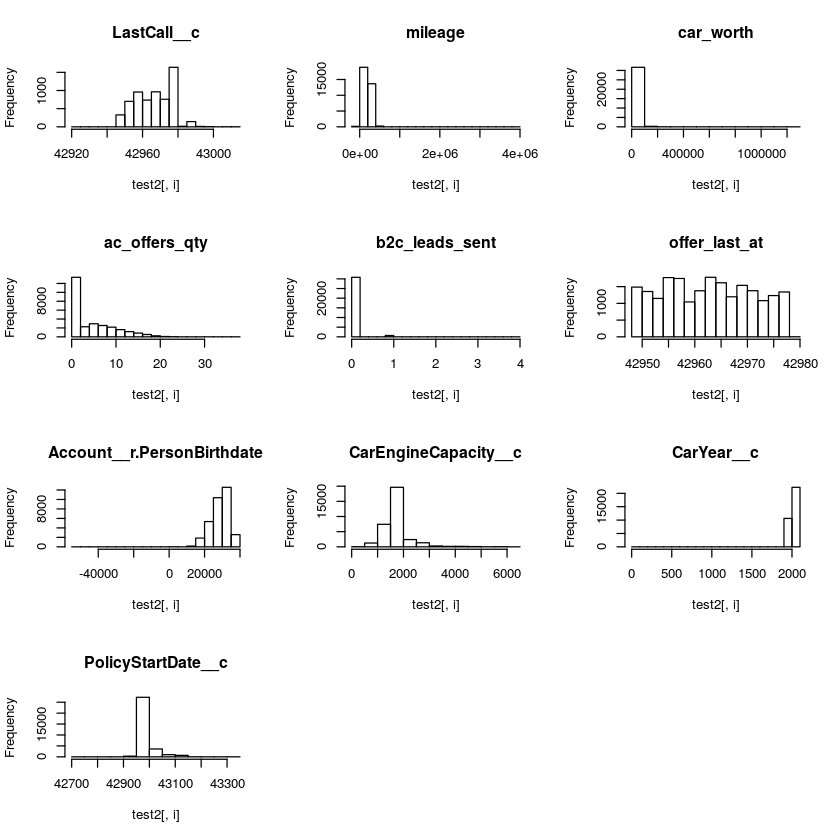

In [481]:
#troche mniej NA w numerycznych predyktorach. pokażę teraz histogramy dla zmiennych, tak dla jaj
par(mfrow=c(4,3))
for (i in t){
    hist(test2[,i],main=colnames(test2)[i])
}

In [482]:
# znowu używam średniej do imputacji wartości. niezbyt mądre, ale cholernie szybkie
for (i in t){
    missing = which(is.na(test2[,i]))
    test2[missing,i] = as.integer(mean(test2[-missing,i]))
}

In [483]:
any(sapply(test2,function(t2)any(is.na(t2))))

[1] FALSE

In [484]:
#wszystko zaimputowane. wszystkie kolumny przekonwertowane do dobrych typow, kody pocztowe zamienione,
#zatem w tym momencie mogę wyznaczać scoring (na ramce test2)

### Zbiór testowy zgodny ze zbiorem train4tml (który daje najlepsze wyniki)

In [485]:
colnames(test2)==head(colnames(train4),-1)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [486]:
test2m = test2
test2m$contactDifference = (test2m$LastCall__c)-(test2m$offer_last_at)

In [487]:
test2m$timeWaiting = (test2m$offer_last_after)-(test2m$offer_first_after)

In [488]:
head(test2m$timeWaiting)

[1] 24 19  6 17  0  1

In [489]:
test2m$hurryTime = (test2m$PolicyStartDate__c)-(test2m$offer_last_at)

In [490]:
#czas wypelniania ankiety

In [491]:
formFillingTimet = (ADD_THIS_form_finished_at)-(ADD_THIS_created_at)
test2m$formFillingTime = formFillingTimet

In [492]:
#imputacja
test2m$formFillingTime[is.na(formFillingTimet)] = mean(test2m$formFillingTime[!is.na(formFillingTimet)])

### Obniżone levele factorow

In [493]:
sapply(test2m,function(l)length(levels(l)))

LastCall__c                     etx_make_name 
                                0                                63 
                   etx_model_name                     etx_fuel_code 
                              637                                 6 
                  production_year                  protection_scope 
                                0                                 2 
                             kind                     use_frequency 
                                2                                 2 
         child_carriage_frequency                           mileage 
                                3                                 0 
                   yearly_mileage                       used_abroad 
                                0                                 0 
              night_parking_place   night_parking_place_postal_code 
                                7                                31 
                day_parking_place     day_parking_place_postal_code 
                                7                                30 
    theft_protection_installation         theft_protection_device_1 
                                5                                 4 
        theft_protection_device_2                            origin 
                                5                                 5 
                         buy_year                 registration_date 
                                0                                 0 
                        car_worth           main_driver_postal_code 
                                0                                31 
                  main_driver_age                main_driver_gender 
                                0                                 3 
                     phone_exists                              step 
                                2                                 0 
                 oc_offer_min_val                     ac_offers_qty 
                                0                                 0 
                   b2c_leads_sent                     offer_last_at 
                                0                                 0 
                offer_first_after                  offer_last_after 
                                0                                 0 
              phone_lookup_status                      utm_campaign 
                                0                               111 
                      utm_content                        utm_medium 
                              285                                32 
                       utm_source                  went_to_partners 
                               75                                 0 
            Acc_PhoneHLRStatus__c          Account__r.AccountSource 
                                5                                18 
Account__r.AgreementMarketing__pc            Account__r.BillingCity 
                                0                              5971 
     Account__r.BillingPostalCode             Account__r.Gender__pc 
                               31                                 3 
       Account__r.PersonBirthdate     Account__r.PhoneHLRStatus__pc 
                                0                                 5 
    Account__r.PhoneNATStatus__pc             Account__r.Salutation 
                                5                                 4 
             CarEngineCapacity__c                    CarFuelType__c 
                                0                                 6 
                       CarYear__c                            Mpc__c 
                                0                                18 
               PolicyStartDate__c                   ProductScope__c 
                                0                                 4 
                        Source__c                  WentToPartner__c 
                               14                                 0 
            dont_hav

In [494]:
#upraszczanie factorów Mpc__c

In [495]:
test2m$Mpc__c = as.factor(tolower(test2m$Mpc__c))
test2m$Mpc__c = addNA(test2m$Mpc__c)

In [496]:
utm_campaign = sapply(test2m$utm_campaign, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('mailing',u,ignore.case=T)>0) {"mailing"} else if 
        (regexpr('kalkulator',u,ignore.case=T)>0){"kalkulator"} else if 
        (regexpr('baner',u,ignore.case=T)>0){"baner"}  else if 
        (regexpr('sprzedany',u,ignore.case=T)>0){"sprzedany"} else
            {u}
})

utm_campaign = as.factor(utm_campaign)
utm_campaign = addNA(utm_campaign)
test2m$utm_campaign = utm_campaign

In [497]:
utm_content = sapply(test2m$utm_content, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('OC',u,ignore.case=T)>0) {"OC"} else if 
        (regexpr('button',u,ignore.case=T)>0){"button"} else
            {u}
})

utm_content = as.factor(utm_content)
utm_content = addNA(utm_content)
test2m$utm_content = utm_content

In [498]:
utm_medium = sapply(test2m$utm_medium, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('baner',u,ignore.case=T)>0) {"baner"} else if 
        (regexpr('banner',u,ignore.case=T)>0){"baner"} else if 
        (regexpr('link',u,ignore.case=T)>0){"link"} else
            {u}
})

utm_medium = as.factor(utm_medium)
utm_medium = addNA(utm_medium)
test2m$utm_medium = utm_medium

In [499]:
salutation = sapply(test2m$Account__r.Salutation, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('ms.',u,ignore.case=T)==1) {"pani"} else if 
        (regexpr('mr.',u,ignore.case=T)==1){"pan"} else if 
        (regexpr('brak',u,ignore.case=T)==1){NA} else
            {u}
})

salutation = as.factor(salutation)
salutation = addNA(salutation)
test2m$Account__r.Salutation = salutation

In [500]:
utm_source = sapply(test2m$utm_source, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('forum',u,ignore.case=T)>0) {"forum"} else if 
        (regexpr('cc',u,ignore.case=T)>0){"cc"}  else
            {u}
})

utm_source = as.factor(utm_source)
utm_source = addNA(utm_source)
test2m$utm_source = utm_source

In [511]:
telehubstatus = sapply(test2m$TelehubStatus__c, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('in_progres',u,ignore.case=T)>0) {"in_progress"} else if 
        (regexpr('success',u,ignore.case=T)>0){"success"}  else if 
        (regexpr('failed',u,ignore.case=T)>0){"failed"}  else
            {u}
})

telehubstatus = as.factor(telehubstatus)
telehubstatus = addNA(telehubstatus)
test2m$TelehubStatus__c = telehubstatus

In [513]:
dim(test2m)
dim(test2)

[1] 32967    65

[1] 32967    60

In [503]:
class(test$is_damaged)

[1] "integer"

In [504]:
test2m$is_damaged = as.factor(test$is_damaged)
mdtest2m = sparse.model.matrix(~.,test2m)

In [505]:
dim(mdtest2m)

[1] 32967  7134

In [516]:
colnames(train4tml)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CarEngineCapacity__c"              "CarFuelType__c"                   
[53] "CarYear__c"                        "Mpc__c"                           
[55] "PolicyStartDate__c"                "ProductScope__c"                  
[57] "Source__c"                         "WentToPartner__c"                 
[59] "dont_have_this_car__c"             "TelehubStatus__c"                 
[61] "Sale.success"                      "contactDifference"                
[63] "timeWaiting"                       "hurryTime"                        
[65] "formFillingTime"                   "is_damaged"                       
[67] "TelehubStatus"

In [509]:
colnames(test2m)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CarEngineCapacity__c"              "CarFuelType__c"                   
[53] "CarYear__c"                        "Mpc__c"                           
[55] "PolicyStartDate__c"                "ProductScope__c"                  
[57] "Source__c"                         "WentToPartner__c"                 
[59] "dont_have_this_car__c"             "TelehubStatus__c"                 
[61] "contactDifference"                 "timeWaiting"                      
[63] "hurryTime"                         "formFillingTime"                  
[65] "TelehubStatus"                     "is_damaged"

### Wyznaczanie scoringu. Na dzień 10/11/2017, używam modelu xgBoost

In [521]:
#sprawdzanie równoważności kolejności zmiennych w zbiorze treningowym i testowym
#nie kontynuować, jeżeli tu będzie false!
all((colnames(train4tml)[-which(colnames(train4ml)=='Sale.success')])==(colnames(test2m))) #head -1 jest użyte by usunąć etykietę

[1] TRUE

In [522]:
colnames(train4tml)[-which(colnames(train4ml)=='Sale.success')]

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CarEngineCapacity__c"              "CarFuelType__c"                   
[53] "CarYear__c"                        "Mpc__c"                           
[55] "PolicyStartDate__c"                "ProductScope__c"                  
[57] "Source__c"                         "WentToPartner__c"                 
[59] "dont_have_this_car__c"             "TelehubStatus__c"                 
[61] "contactDifference"                 "timeWaiting"                      
[63] "hurryTime"                         "formFillingTime"                  
[65] "is_damaged"

In [523]:
colnames(test2m)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CarEngineCapacity__c"              "CarFuelType__c"                   
[53] "CarYear__c"                        "Mpc__c"                           
[55] "PolicyStartDate__c"                "ProductScope__c"                  
[57] "Source__c"                         "WentToPartner__c"                 
[59] "dont_have_this_car__c"             "TelehubStatus__c"                 
[61] "contactDifference"                 "timeWaiting"                      
[63] "hurryTime"                         "formFillingTime"                  
[65] "is_damaged"

In [524]:
#macierze rzadkie
mdtrain = sparse.model.matrix(Sale.success ~ ., train4tml)
mdtest = sparse.model.matrix(~ .,test2m)
#dane testowe mają mniej leveli factorów
dim(mdtrain)
dim(mdtest)

[1] 93646  8451

[1] 32967  7118

In [525]:
#xgboost importance

trainxg = xgb.DMatrix(mdtrain,label=train4$Sale.success)

xg=  xgboost(trainxg, nrounds=10, objective = "binary:logistic")

xgi = xgb.importance(colnames(mdtrain),xg)
xgselected = head(xgi$Feature,40)
xgcols = sapply(xgselected,function(xgs){which(colnames(mdtrain)==xgs)})

[1]	train-error:0.047797 
[2]	train-error:0.047861 
[3]	train-error:0.047936 
[4]	train-error:0.047840 
[5]	train-error:0.047850 
[6]	train-error:0.047968 
[7]	train-error:0.047808 
[8]	train-error:0.047765 
[9]	train-error:0.047690 
[10]	train-error:0.047626 


In [526]:
xgcols

went_to_partners 
                                        1152 
                             formFillingTime 
                                        8450 
                         phone_lookup_status 
                                         951 
                     TelehubStatus__csuccess 
                                        8445 
                                utm_sourcecc 
                                        1092 
                                 LastCall__c 
                                           2 
                            oc_offer_min_val 
                                         945 
                                   hurryTime 
                                        8449 
                            WentToPartner__c 
                                        8442 
                                 timeWaiting 
                                        8448 
                            offer_last_after 
                                         950 
                          PolicyStartDate__c 
                                        8421 
                               ac_offers_qty 
                                         946 
                           contactDifference 
                                        8447 
                                   car_worth 
                                         908 
                     Account__r.SalutationNA 
                                        8397 
                                  CarYear__c 
                                        8404 
                             main_driver_age 
                                         939 
                                    Mpc__cNA 
                                        8420 
                          TelehubStatus__cNA 
                                        8446 
                                     mileage 
                                         814 
                                        step 
                                         944 
                           protection_scope2 
                                         805 
                     phone_existsphone_exist 
                                         942 
                  Account__r.PersonBirthdate 
                                        8384 
                        CarEngineCapacity__c 
                                        8398 
                               offer_last_at 
                                         948 
                           offer_first_after 
                                         949 
                           ProductScope__cOC 
                                        8422 
                           registration_date 
                                         907 
           Account__r.AccountSourcefull_calc 
                                        1159 
                           utm_contentbutton 
                                        1025 
                             production_year 
                                         804 
                        ProductScope__cOC+AC 
                                        8423 
                      use_frequencyregularly 
                                         809 
                              yearly_mileage 
                                         815 
           Account__r.AgreementMarketing__pc 
                                        1178 
                                    buy_year 
                                         906 
night_parking_place_postal_codePoznan Region 
                                         841 
                    Account__r.BillingCityNA 
                                        8351

In [527]:
#sprawdzenie, czy te kolumny znajdują się w zbiorze testowym (z powodu innej liczby factorów, nie wiadomo):
in_test_features = sapply(names(xgcols),function(xc)any(colnames(mdtest)==xc))

In [528]:
in_test_features

went_to_partners 
                                        TRUE 
                             formFillingTime 
                                        TRUE 
                         phone_lookup_status 
                                        TRUE 
                     TelehubStatus__csuccess 
                                        TRUE 
                                utm_sourcecc 
                                        TRUE 
                                 LastCall__c 
                                        TRUE 
                            oc_offer_min_val 
                                        TRUE 
                                   hurryTime 
                                        TRUE 
                            WentToPartner__c 
                                        TRUE 
                                 timeWaiting 
                                        TRUE 
                            offer_last_after 
                                        TRUE 
                          PolicyStartDate__c 
                                        TRUE 
                               ac_offers_qty 
                                        TRUE 
                           contactDifference 
                                        TRUE 
                                   car_worth 
                                        TRUE 
                     Account__r.SalutationNA 
                                        TRUE 
                                  CarYear__c 
                                        TRUE 
                             main_driver_age 
                                        TRUE 
                                    Mpc__cNA 
                                        TRUE 
                          TelehubStatus__cNA 
                                        TRUE 
                                     mileage 
                                        TRUE 
                                        step 
                                        TRUE 
                           protection_scope2 
                                        TRUE 
                     phone_existsphone_exist 
                                        TRUE 
                  Account__r.PersonBirthdate 
                                        TRUE 
                        CarEngineCapacity__c 
                                        TRUE 
                               offer_last_at 
                                        TRUE 
                           offer_first_after 
                                        TRUE 
                           ProductScope__cOC 
                                        TRUE 
                           registration_date 
                                        TRUE 
           Account__r.AccountSourcefull_calc 
                                        TRUE 
                           utm_contentbutton 
                                        TRUE 
                             production_year 
                                        TRUE 
                        ProductScope__cOC+AC 
                                        TRUE 
                      use_frequencyregularly 
                                        TRUE 
                              yearly_mileage 
                                        TRUE 
           Account__r.AgreementMarketing__pc 
                                        TRUE 
                                    buy_year 
                                        TRUE 
night_parking_place_postal_codePoznan Region 
                                        TRUE 
                    Account__r.BillingCityNA 
                                        TRUE

In [529]:
selected_features = names(xgcols)[in_test_features]

In [530]:
length(selected_features)

[1] 40

In [531]:
#kolumny wybrane do predykcji
selected_features

[1] "went_to_partners"                            
 [2] "formFillingTime"                             
 [3] "phone_lookup_status"                         
 [4] "TelehubStatus__csuccess"                     
 [5] "utm_sourcecc"                                
 [6] "LastCall__c"                                 
 [7] "oc_offer_min_val"                            
 [8] "hurryTime"                                   
 [9] "WentToPartner__c"                            
[10] "timeWaiting"                                 
[11] "offer_last_after"                            
[12] "PolicyStartDate__c"                          
[13] "ac_offers_qty"                               
[14] "contactDifference"                           
[15] "car_worth"                                   
[16] "Account__r.SalutationNA"                     
[17] "CarYear__c"                                  
[18] "main_driver_age"                             
[19] "Mpc__cNA"                                    
[20] "TelehubStatus__cNA"                          
[21] "mileage"                                     
[22] "step"                                        
[23] "protection_scope2"                           
[24] "phone_existsphone_exist"                     
[25] "Account__r.PersonBirthdate"                  
[26] "CarEngineCapacity__c"                        
[27] "offer_last_at"                               
[28] "offer_first_after"                           
[29] "ProductScope__cOC"                           
[30] "registration_date"                           
[31] "Account__r.AccountSourcefull_calc"           
[32] "utm_contentbutton"                           
[33] "production_year"                             
[34] "ProductScope__cOC+AC"                        
[35] "use_frequencyregularly"                      
[36] "yearly_mileage"                              
[37] "Account__r.AgreementMarketing__pc"           
[38] "buy_year"                                    
[39] "night_parking_place_postal_codePoznan Region"
[40] "Account__r.BillingCityNA"

In [532]:
colnames(xgtrain)

[1] "went_to_partners"                      
 [2] "phone_lookup_status"                   
 [3] "formFillingTime"                       
 [4] "LastCall__c"                           
 [5] "utm_sourcecc"                          
 [6] "oc_offer_min_val"                      
 [7] "TelehubStatus__csuccess_callmeback_kom"
 [8] "hurryTime"                             
 [9] "PolicyStartDate__c"                    
[10] "contactDifference"                     
[11] "offer_last_after"                      
[12] "timeWaiting"                           
[13] "TelehubStatus__cNA"                    
[14] "ac_offers_qty"                         
[15] "Account__r.SalutationNA"               
[16] "main_driver_age"                       
[17] "mileage"                               
[18] "registration_date"                     
[19] "Mpc__cNA"                              
[20] "offer_last_at"                         
[21] "CarEngineCapacity__c"                  
[22] "car_worth"                             
[23] "WentToPartner__c"                      
[24] "ProductScope__cOC"                     
[25] "CarYear__c"                            
[26] "Account__r.PersonBirthdate"            
[27] "phone_existsphone_exist"               
[28] "offer_first_after"                     
[29] "protection_scope2"                     
[30] "Account__r.AccountSourcefull_calc"     
[31] "yearly_mileage"                        
[32] "step"                                  
[33] "Account__r.BillingCityNA"              
[34] "Acc_PhoneHLRStatus__cniesprawdzony"    
[35] "etx_model_nameClio"                    
[36] "production_year"                       
[37] "ProductScope__cOC+AC"                  
[38] "Account__r.BillingPostalCodeGdansk"    
[39] "utm_sourcewykop"                       
[40] "buy_year"

In [409]:
xgtrain = mdtrain[,selected_features]

In [410]:
dim(xgtrain)

[1] 93646    40

In [411]:
#tuning dla wybranych predyktorów
sa = sample(1:nrow(xgtrain),20000,replace=F)
xgtrain2 = as.matrix(xgtrain[sa,])

In [412]:
xgFitControl = trainControl (method="cv",number = 4) #4fold
xgx = xgtrain2
xgy = as.factor(train4$Sale.success[sa])
xgModel = train(xgx,xgy,
    method = "xgbTree",
    trControl = xgFitControl)

In [414]:
#tuning
besttune = xgModel$bestTune
besttune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
4,50,1,0.3,0,0.6,1,0.75


In [144]:
#tuning
besttune = xgModel$bestTune
besttune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
31,50,2,0.3,0,0.8,1,0.75


In [152]:
#trenowanie właściwego modelu
trainxg = xgb.DMatrix(xgtrain,label=train4$Sale.success)

xg =  xgboost(params= xgModel$bestTune, data = trainxg, nrounds=50, objective = "binary:logistic")

[1]	train-error:0.048534 
[2]	train-error:0.048534 
[3]	train-error:0.048534 
[4]	train-error:0.048534 
[5]	train-error:0.048534 
[6]	train-error:0.048534 
[7]	train-error:0.048534 
[8]	train-error:0.048534 
[9]	train-error:0.048534 
[10]	train-error:0.048534 
[11]	train-error:0.048534 
[12]	train-error:0.048534 
[13]	train-error:0.048534 
[14]	train-error:0.048534 
[15]	train-error:0.048534 
[16]	train-error:0.048534 
[17]	train-error:0.048534 
[18]	train-error:0.048523 
[19]	train-error:0.048512 
[20]	train-error:0.048512 
[21]	train-error:0.048523 
[22]	train-error:0.048523 
[23]	train-error:0.048523 
[24]	train-error:0.048545 
[25]	train-error:0.048523 
[26]	train-error:0.048523 
[27]	train-error:0.048491 
[28]	train-error:0.048523 
[29]	train-error:0.048491 
[30]	train-error:0.048459 
[31]	train-error:0.048438 
[32]	train-error:0.048416 
[33]	train-error:0.048427 
[34]	train-error:0.048416 
[35]	train-error:0.048395 
[36]	train-error:0.048438 
[37]	train-error:0.048427 
[38]	train

In [153]:
#predykcja na zbiorze testowym
#w tym miejscu sprawdzam czy indeksy w rzadkich macierzach zbioru testowego i treningowego dokładnie się zgadzają
colnames(mdtrain[,selected_features])==colnames(mdtest[,selected_features])

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [368]:
#jeśli wszędzie wyżej jest true, można wybrać zbiór testowy i puścić predykcję

In [154]:
xgtest = mdtest[,selected_features]

In [155]:
dim(xgtest)

[1] 32967    40

In [156]:
pred_test = predict(xg,xgtest,type="response")

In [157]:
write.table(pred_test,"ABH-pred2.csv",col.names=F,row.names=F)